In [320]:
# Tasks 
# Add imports
# Read dataset file
# Create a list of twitter ids 
# Save them to a csv
# Start scrapper

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
%config InlineBackend.figure_format = 'svg'
%matplotlib inline


In [3]:
ushahidi_df = pd.read_csv("data/ushahidi.csv")
ushahidi_df.shape

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_2813/4251487812.py:1: DtypeWarning: Columns (4,8,10,11,12,13,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,37,38,39,40,41,42,44,45,46,47,49,50,51,52,53,54,55,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,74,77,78,79,80,81,82,83,84,85,86,87,89,90,91,92,93,94,95,98,99,100,101,102,103,104,105,106,107,108,110,111,112,113,114,115,116,119,120,121,123,124,125,126,128,129,131,132,133,134,135,136,137,140,141,142,143,144,145,146,147,148,149,150,152,153,154,155,156,157,158,161,162,163,164,165,166,167,168,169,170,172,173,175,176,177,178,179,182,183,184,185,186,187,188,189,190,192,193,194,195,196,197,200,201,202,203,204,206,207,208,209,212,213,214,215,218,219,220,221,222,223,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,244,245,246,251,255,258,259) have mixed types. Specify dtype option on import or set low_memory=False.
  ushahidi_df = pd.read_csv("data/ushahidi.csv")


(102387, 260)

In [12]:
ushahidi_df.head()

,Post ID,Survey,Post Status,Created (UTC),Updated (UTC),Post Date (UTC),Contact ID,Contact,Data Source ID,Source,...,Location - Automated.lon,Long text - Automated,Markdown - Automated,Number (Decimal) - Automated,Number (Integer) - Automated,Radio Button(s) - Automated,Related Post - Automated,Select - Automated,Short text - Automated,Checkbox(es)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,Polling Station Administration,published,2022-06-27 13:47:09,2022-08-02 21:37:34,2022-06-27 13:45:01,1.0,1.146125e+18,1541417316273246208.0,twitter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,Unstructured,draft,2022-06-27 13:47:09,NaN,2022-06-27 13:44:20,2.0,1.510781e+18,1541417144390483968.0,twitter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,Polling Station Administration,archived,2022-06-27 13:47:09,2022-06-27 13:59:36,2022-06-27 13:25:51,2.0,1.510781e+18,1541412494526259200.0,twitter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.0,Unstructured,draft,2022-06-27 13:47:10,NaN,2022-06-27 12:56:55,3.0,3.363881e+09,1541405214187687936.0,twitter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Filter Twitter reports
tweets_df = ushahidi_df[ushahidi_df.Source == 'twitter']

In [14]:
tweets_df.shape

(99254, 260)

In [25]:
# Check for any null ids  - no null ids
tweets_df['Data Source ID'].isnull().sum()

0

In [26]:
# Create a series of tweet ids
tweet_ids = tweets_df['Data Source ID']

In [27]:
# Convert tweet ids ints to str
tweet_ids = tweet_ids.astype(int)

In [29]:
len(tweet_ids)

99254

In [33]:
# Output list of tweets as csv
tweet_ids.to_csv('2022_tweet_ids.txt', header=False, index=False, lineterminator='\n')

In [4]:
ushahidi_df.head()

,Post ID,Survey,Post Status,Created (UTC),Updated (UTC),Post Date (UTC),Contact ID,Contact,Data Source ID,Source,...,Location - Automated.lon,Long text - Automated,Markdown - Automated,Number (Decimal) - Automated,Number (Integer) - Automated,Radio Button(s) - Automated,Related Post - Automated,Select - Automated,Short text - Automated,Checkbox(es)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,Polling Station Administration,published,2022-06-27 13:47:09,2022-08-02 21:37:34,2022-06-27 13:45:01,1.0,1.146125e+18,1541417316273246208.0,twitter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,Unstructured,draft,2022-06-27 13:47:09,NaN,2022-06-27 13:44:20,2.0,1.510781e+18,1541417144390483968.0,twitter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,Polling Station Administration,archived,2022-06-27 13:47:09,2022-06-27 13:59:36,2022-06-27 13:25:51,2.0,1.510781e+18,1541412494526259200.0,twitter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.0,Unstructured,draft,2022-06-27 13:47:10,NaN,2022-06-27 12:56:55,3.0,3.363881e+09,1541405214187687936.0,twitter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Drop all columns that are fully null
print(f"Before dropping columns that are null : {ushahidi_df.shape}")
ushahidi_df = ushahidi_df.dropna(axis=1, how='all')
print(f"After dropping columns that are null : {ushahidi_df.shape}")
# Dropped 16 columns from the data set

Before dropping columns that are null : (102387, 260)
After dropping columns that are null : (102387, 244)


In [6]:
# Filter only labelled posts
published_df = ushahidi_df[ushahidi_df["Survey"] != "Unstructured"]

In [7]:
print(f"The number of labelled election reports in the data set is {len(published_df)}")

The number of labelled election reports in the data set is 16220


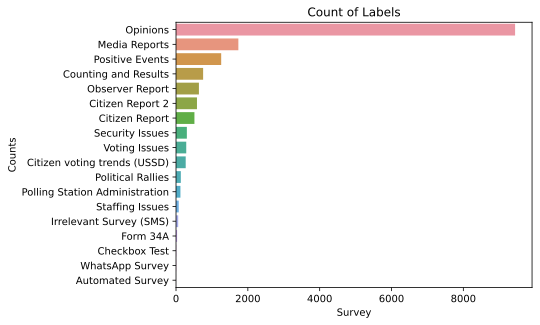

In [8]:
# Get label distribution to visualise class imbalances
# Group by survey and calculate counts for each label

grouped_counts = published_df.groupby("Survey").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='Survey')
plt.xlabel('Survey')
plt.ylabel('Counts')
plt.title('Count of Labels')
plt.show()

In [9]:
grouped_counts.sort_values(["Counts"], ascending=False)

,Survey,Counts
10,Opinions,9441
8,Media Reports,1736
13,Positive Events,1258
5,Counting and Results,755
9,Observer Report,638
3,Citizen Report 2,584
2,Citizen Report,513
14,Security Issues,302
16,Voting Issues,285
4,Citizen voting trends (USSD),270


In [10]:
cols_of_interest = ["Post ID", "Survey", "Post Status", "Created (UTC)", "Updated (UTC)", "Post Date (UTC)", 
                    "Source", "Data Source ID", "Source"]

In [11]:
# Inspect each group

In [12]:
# What if I create a function that takes a list of duplicated columns then for each column, finds the columns related to it and creates a new column with the cleaned values
#Dictionary to contain column name as key and the new column name to create 
#dp prefix before column name is used as shorthand for deduplicated
duplicated_cols_to_be_cleaned = { 
    "Title":"dp_title",
    "Description":"dp_description",
    "Location.lat": "dp_location_lat", 
    "Location.lon": "dp_location_long",
    "Nature of this incident":"dp_nature_of_this_incident",
    "Verification Status":"dp_verificiation_status",
    "Media Source":"dp_media_source",
    "Translation Status": "dp_translation_status",
    "Description Translation": "dp_description_translation"
}

def deduplicate_cols(dp_dict:dict, df:pd.DataFrame):
    def clean_row(row, dup_cols):
        val = np.nan
        for col in dup_cols:
            if pd.isnull(row[col]) != True:
                val = row[col]
        return val 

    for duplicted_col_name in dp_dict.keys():
        # Get all the list of columns that match the duplicated column name 
        dup_cols = df.columns[df.columns.str.contains(pat = duplicted_col_name)]
        # Create a new column that deduplicates the columns
        df[dp_dict[duplicted_col_name]] = df.apply(lambda row: clean_row(row, dup_cols), axis=1)
    
    return df


In [13]:
published_df = deduplicate_cols(duplicated_cols_to_be_cleaned, published_df)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_2813/3143249718.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dp_dict[duplicted_col_name]] = df.apply(lambda row: clean_row(row, dup_cols), axis=1)
/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_2813/3143249718.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dp_dict[duplicted_col_name]] = df.apply(lambda row: clean_row(row, dup_cols), axis=1)
/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_2813/3143249718.py:

In [14]:
deduplicated_cols = list(duplicated_cols_to_be_cleaned.values())

In [15]:
published_df[deduplicated_cols].sample(10)

,dp_title,dp_description,dp_location_lat,dp_location_long,dp_nature_of_this_incident,dp_verificiation_status,dp_media_source,dp_translation_status,dp_description_translation
56178,ARE THE STICKERS SO SENSITIVE TO BUNGLE AN ENT...,"Are stickers so ""sensitive"" as to warrant bung...",-1.144219,36.968562,Positive Opinions,"Verification, Verified","Media Stream Source, Twitter","Translation, Needs Translation",NaN
2037,Raila Odinga Cursed,When the ancestral spirits conspire against yo...,-1.254058,36.861861,Personal Opinion,"Verification, Unverified","Media Stream Source, Twitter","Translation, No need for translation",NaN
7754,Let us await IEBC results announcements as cla...,We should be patient as Kenyans as IEBC are wo...,-1.292066,36.821946,Personal Opinion,"Verification, False / Misinformation","Media Stream Source, Twitter","Translation, No need for translation",NaN
63072,"IEBC Chairman, Hussein Marjan, and the three V...","IEBC Chairman, Hussein Marjan, and the three V...",-1.283253,36.817245,Negative opinions,"Verification, Unverified",NaN,"Translation, No need for translation",NaN
95750,IEBCKenya returning officers/officials HINDERI...,We are receiving disturbing reports of @IEBCKe...,-1.292066,36.821946,IEBC Officials not Acting In Accordance to Set...,"Verification, No need for verification","Media Stream Source, Twitter","Translation, No need for translation",NaN
74384,IEBC meeting,IEBC to meet Azimio representatives tomorrow f...,-1.252342,36.826201,Positive Opinions,"Verification, Unverified","Media Stream Source, Twitter","Translation, No need for translation",NaN
39442,(USSD Feedback),(USSD Feedback),NaN,NaN,NaN,NaN,NaN,NaN,NaN
52608,AMANI KENYA,Kenya Yetu Jukumu Letu\nRada ni peace#Uchaguzi...,-3.974226,39.748759,Positive Opinions,"Verification, No need for verification","Media Stream Source, Twitter","Translation, Needs Translation",NaN
98209,ABOVE AVERAGE VOTER TURNOUT IN GITUNGANO POLLI...,"Gitungano polling station,Mbiri Ward 480 total...",-0.730577,37.185475,Personal Opinion,"Verification, No need for verification","Media Stream Source, Twitter","Translation, No need for translation",NaN
74670,KINOTI IS BEING UNDERMINED,Kinoti kwani ako level kidogo aje. Dpp na cheb...,-1.233807,36.980019,Personal Opinion,"Verification, Verified","Media Stream Source, Twitter","Translation, No need for translation",NaN


In [16]:
cols_of_interest = cols_of_interest +  deduplicated_cols

In [17]:
published_df[cols_of_interest].head()

,Post ID,Survey,Post Status,Created (UTC),Updated (UTC),Post Date (UTC),Source,Data Source ID,Source,dp_title,dp_description,dp_location_lat,dp_location_long,dp_nature_of_this_incident,dp_verificiation_status,dp_media_source,dp_translation_status,dp_description_translation
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,Polling Station Administration,published,2022-06-27 13:47:09,2022-08-02 21:37:34,2022-06-27 13:45:01,twitter,1541417316273246208.0,twitter,Nominated Senator Beth Mugo requests IEBC to c...,https://twitter.com/1146124540055052289/status...,-1.303169,36.826061,Polling station logistical issues,"Verification, Verified, No need for verification",NaN,"Translation, No need for translation",NaN
3,6.0,Polling Station Administration,archived,2022-06-27 13:47:09,2022-06-27 13:59:36,2022-06-27 13:25:51,twitter,1541412494526259200.0,twitter,Nominated Senator Beth Mugo requests IEBC to c...,https://twitter.com/1510781350902706180/status...,-1.283253,36.817245,Polling station logistical issues,"Verification, Verified",NaN,"Translation, No need for translation",NaN
631,634.0,Opinions,published,2022-07-05 05:09:03,2022-08-03 10:04:14,2022-07-05 05:08:29,twitter,1544186432301957120.0,twitter,YOUTH PARTICIPATION IN THE GENERAL ELECTIONS .,"Elections are coming. Youths should turn up,vo...",-1.283253,36.817245,Peace messages,"Verification, No need for verification","Media Stream Source, Twitter","Translation, No need for translation",NaN
634,637.0,Opinions,published,2022-07-05 05:17:07,2022-08-05 06:25:38,2022-07-05 05:16:28,twitter,1544188438773207040.0,twitter,VOTER EDUCATION AMONG THE YOUTH.,It is important for youths to understand the e...,-1.303264,36.826384,Peace messages,"Verification, Verified","Media Stream Source, Twitter","Translation, No need for translation",NaN


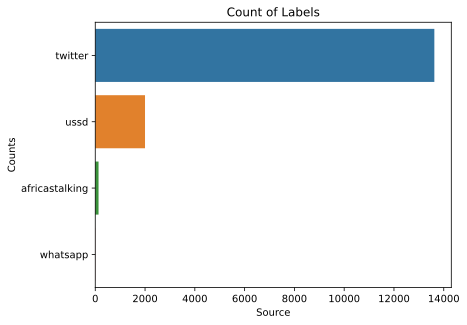

In [18]:
# Get label distribution to visualise class imbalances
# Group by survey and calculate counts for each label

grouped_counts = published_df.groupby("Source").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='Source')
plt.xlabel('Source')
plt.ylabel('Counts')
plt.title('Count of Labels')
plt.show()

In [19]:
# For each group visualise a sample of posts to get a sense of the data
multiclass_labels = ['Polling Station Administration', 'Opinions', 'Media Reports',
       'Political Rallies', 'Positive Events', 'Security Issues',
       'Voting Issues', 'Counting and Results', 'Staffing Issues']

In [20]:
# Why did i add this here?
# To allow me to print out texts in full width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_colwidth', None)


In [21]:
# Sample a list of Polling Station Administration - polling station administration refers to electoral issues related to polling station
published_df[published_df.Survey == 'Polling Station Administration'][["dp_description"]].sample(10)

,dp_description
93557,Gubernatorial election suspended in Kakamega and Mombasa.\n Also suspended is National Assembly election in Kacheliba and Pokot South. All these due to possible printing errors.
96884,"Kaguria polling Station, South Kabuoch/Pala Ndhiwa: a kiems kit has mulfunctioned, IEBC office in Ndhiwa alerted,slow response."
97654,Turn out in the village is quite low in the afternoon about 30% #KenyaDecides2022 \n#KenyaDecides
97611,Voter turnout is low on the scale of 1-5 2
95177,"IEBC officials seal off ballot boxes in Kinoru Primary School, Meru County before the official time of voting"
78052,"The highest turn out on election day was NYANZA REGION.\nThis delayed the forms;IEBC releases results in the order of reception,Nyanza region was last to send but all forms are now available.\nRelax"
97716,Kenyans love last minute rush. A turnout of 30% (6.57M) is huge.\nWe are looking at over 75% turnout by close of voting.
94514,Chebukati Addresses Reports On Destruction Of Ballot Papers In Tharaka Nithi.
100905,Low voter turnout marks elections in Mt Kenya
74419,IEBC protests last minute barring of teachers from manning elections


In [23]:
# Sample a list of Polling Station Administration - polling station administration refers to electoral issues related to polling station
published_df[published_df.Survey == 'Opinions'][["dp_description"]].sample(10)

,dp_description
64056,"Priority number 1 was BBI , priority number 2 was BBI and number 3 was BBI. They knew BBI with the current IEBC would keep Ruto away. Now BBI failed. Maringo ya kutupa Weta and MDVD to replace with Martha...is not adding up. So we remain to say IEBC is working for Ruto? We know.."
64847,"I don't like the games Chebukati is playing. The country cannot survive a prolonged election dispute given the economic vulnerabilities we are facing. We need a free, fair and credible election now more than ever before."
70357,We must of an option of Arresting and jailing IEBC officials when they run IEBC like a criminal enterprise. We must have an option of disbanding IEBC when it operates ultra vires. We can't be helpless at the hands of criminals.
631,"Elections are coming. Youths should turn up,vote and Preach peace before, during and after the Elections. We can never be used and divided for selfish Political Interests."
97708,"What people also don't understand why we have short queues is that IEBC created more streams and decentralised some polling stations, there are polling stations in my area with less than 100 registered voters, I even saw another on in Baringo at the roadside."
64239,"In short, the Kenya Kwanza being players in this coming elections support reckless behaviour of the IEBC just transporting crucial materials in such a manner,who is fooling who? Loopholes must be sealed,we need transparency when it comes to IEBC"
73983,@TrevorOmbija #DayBreak how I wish this accountability demands should be applied Also to other institutions. IEBC is just a punching for people who feel like they are losing.
73804,"With Chiloba at CAK presiding over 2022 general elections live transmission system, James Muhati at huduma centre, Emmanuel Kassait presiding over data collection and Kibicho providing security, it will be v difficult to deafeat deep state candidate evn if that candidate is a dog"
2783,"MAY PEACE, LIKE A RIVER FREELY FLOW\n\nLoyalty and allegiance of a people are tested and manifested on the table of great decision making. We have held our peace with tender hands before, during and after the elections. We can proudly and rightly say, 'Tunajivunia kuwa Wakenya."
90962,The deep state will not stop us - DP Ruto


In [24]:
published_df[published_df.Survey == 'Political Rallies'][["dp_description"]].sample(10)

,dp_description
86971,President Uhuru Kenyatta endorses Hon. Abdulswamad Shariff Nassir as the next Governor Mombasa County during is visit to the county....
64659,"Full house! Current situation at Kapkatet, Kericho County before our arrival."
82648,"DP William Ruto making moves in Kerugoya while azimio are still riding on IPSOS polls.\nground will be more slippery for azimio.\n\nuasin gishu, kuresoi, raila amollo odinga, mudavadi, us embassy\n#KenyaDecides2022 #KenyaDecides"
55344,"Mike Sonko is a looser after the IEBC disqualified him from Running as Mombasa Governor and Lost all court battles simultaneously at the supreme court, Now stages a PR show that he can add value on the Kenya Kwanza Alliance on remaining 9days."
74304,Kilifi Governor warns politicians against meddling with the IEBC.
63109,"Kapkatet declaration. No wonder they have pulled out of the debate. I see them pulling out of the elections too. H.E William Ruto is winning by a landslide, Round One.\nWe are African and Africa is our Business.."
80165,Please let's vote peacefully! Politics is not about enmity but a competition where there must be a winner and loser. It will come and go. No one will go to Sugoi or Bondo. One will head to statehouse while the other one will remain in Karen.
86983,"DP Ruto says during a political rally in Muranga that he has never insulted the president instead, he accuses Azimio politicians..."
63760,This is the first election campaign in Kenya where Wanjiku and Mama Mboga are sitting on the driver's seat...IMPRESSIVE!
65111,Ruto dismisses Kinoti’s long statement on Chebukati as showbiz


In [25]:
published_df[published_df.Survey == 'Positive Events'][["dp_description"]].sample(10)

,dp_description
97173,I'm gabra from Kikuyu. Here at Kikuyu we are voting peacefully
74950,"My earnest prayer is that no one dies in this election. And no one is attacked or their property destroyed. Even one life lost is way too many. 2017 was enough, should never have happened! \n\nAnd to the IEBC, Media & Judiciary, we are looking on you to do what is right!"
23608,Breaking news: The Missing IEBC Returning Officer has been found dead in Loitoktok. Authorities must dig into this matter.
663,EU Observer Mission @MissionEu paid a courtesy call to the Commission and discussed areas of mutual interest and collaboration in the electoral process
85854,They are talking about peace
82006,Representing Jijenge Youth Initiative in the IEBC stakeholders meeting happening at Kenya Red Cross Malindi. Let's come out in large numbers come 9th of August and exercise our right to vote.
6577,"Mwenyekiti wa IEBC, Wafula Chebukati anaendelea kutangaza matokeo ya Urais kwenye majimbo.\n\nMatokeo ya Jimbo la Baringo\n\nRaila: 1,656\nRuto: 33,162\nWajackoyah: 62\nWaihiga: 26\n\nWaliojiandikisha: 45,949\nKura halali: 34,906\nZilizokataliwa: 1"
95222,"The polls have opened. 22 million Kenyans are voting for a new President today. They will be casting their votes for a President, and local representatives in the National and County Assemblies"
53241,"Happening now: the Commission Secretary/CEO @SkitterDr attending the Launch of political education sourcebook training manuals themed Sustaining Peace in Kenya. Event taking place at Safari Park Hotel, Nairobi. \n#ElectionsBilaNoma #LetPeaceWin @UNDPKenya"
82692,"Sheila, one of our Grade 5 champions reminding us to keep and maintain peace during this election period."


In [26]:
published_df[published_df.Survey == 'Security Issues'][["dp_description"]].sample(10)

,dp_description
27569,This is very DANGEROUS Mr. Babu. Kindly pull this down. Gently Do Not guide Kenyans towards the Rocks. \n\nIEBC is the only Beacon of Light at this moment.
23366,"Your results should be nullified, you can't assault the IEBC staff,"
74725,"This is crazy. You write numbers on a helicopter assuming that's where IEBC will announce the result, you act childishly"
74773,CHEBUKATI meets @IG_NPS over election security; controversy on poll stickers seized at JKIA last week resolved.
74815,"@NPSOfficial_KE to deploy 150,000 security personnel before and during August 9 poll in all polling and tallying centers, @IEBCKenya Chair Wafula Chebukati says."
48496,"Dear Azimio Politburo, supporters, Luminaries, generals lieutenants and renegades note:\n\nCEO East Africa Data Handlers has confirmed. Media houses were hacked today morning at 2am. An INJECTION algorithm was added.\n\nUDA are trying to force a win. We are alert!\n\n#KenyaDecides"
11265,"JUST IN: Embakasi East Constituency R.O Daniel Mbolu Musyoka reportedly missing. This is more than sad! \n\n~ Wafula Chebukati, IEBC Chair"
79961,"ASSASSIN \n@FredMatiangi\n claims that he has arrested 8 people who were distributing leaflets in Uasin Gishu. Publish their images, names, and addresses the way you usually do with all your concoctions. You cannot do so because they are EMPLOYEES of NIS and \n@StateHouseKenya"
34157,You cannot blame IEBC or put responsibility on any politically instigated deaths unfortunately! If Dismus shoots someone how is that Chebukatis fault!!!
30479,"Press Release - Staff Murder, Profiling and Misleading Reports on Presidential Election"


In [27]:
published_df[published_df.Survey == 'Voting Issues'][["dp_description"]].sample(10)

,dp_description
50537,Rigging in broad day light??? - Two ballot boxes with governors' ballots enter Kianyaga through the back door in broad daylight! They MUST be removed and tallying MUST stop! @IEBCKenya\n\n@WilliamsRuto @rigathi @MusaliaMudavadi @Wetangulam
96589,This is wrong. @IEBCKenya should do better.
97093,"logging an official complaint, why was my cousin's name transferred to Kisii while it's clearly mentioned Kamenu ward Kiambu. She woke up early to go and vote and now her rights has been denied."
97007,Caught pants down! Embu sub-chief stopped right in the middle of her attempts to buy IDs.\n#IEBC Moses Kuria Raila Odinga
99347,"In Kisumu, Kisumu Central, Kondele, Kondele Markets tent 1, Total Number of Votes cast is higher than total voters .@OleItumbi #ElectionsKe #KenyaDecides2022"
94751,"Police in Transmara West, Narok County, say they have opened investigations into an incident Monday evening where two officers were found hauling marked ballot papers. The officers who had since been taken into custody were intercepted with the papers at Shell Petrol Station in Kilgoris after members of public raised alarm.\n\nThey were identified as Michael Cheptoo, a Sergeant and Daniel Chepkwony, a constable."
96007,"Parliamentary Election in Rongai suspended by IEBC as wrong candidates are presented for elections\n#KenyaDecides2022 @nbstv ,@DailyMonitor ,@newvisionwire"
96987,"IEBC has temporarily suspended MP elections in Rongai Constituency after a mix-up in the MPs ballot papers.\n""The IEBC headquarters in Nairobi will give further communications.” IEBC Manager Joseph Mele."
96874,"No weapons formed against us shall prosper, says George Wajackoyah’s wife Meller Luchiri following the failure of KIEMS kit at Indangalasia Primary School in Matungu. Wajackoyah is yet to vote due to the technical hitches at the station.\n#KenyaDecides2022 #KenyaDecides"
101135,"Citizen are loading the forms and adding them one by one and thats what is in bomas of kenya where Chebukati is...These misleading of itumbi ,you can see they have stopped to show fake results"


In [28]:
published_df[published_df.Survey == 'Counting and Results'][["dp_description"]].sample(10)

,dp_description
27779,https://twitter.com/1226601238252412928/status/1557654795003068418
1529,"Candidates will have a £300,000 spending limit. Excluding travel expenses. This is an increase on the 2019 leadership election."""
27012,Ktn currently showing Ruto at 5.9m and Raila at 5.77m....who is right who is wrong? IEBC still haven't posted results
50679,"Kenyan Techwhiz: \n\nA script that can crawl the IEBC website, download the forms, OCR Capture 6 data points from Form 34A in addition to County. SubCounty and polling station. \n\n46,000 data entries. Output to CSV. PFD. Excel And compare with \n\nIs that doable in 5 hours?"
27159,Congrats @WanguiNgirici your win is of great significance #kenyaelections2022
101027,"Mohamed Ali of UDA Elected Nyali Constituency MP, Beating Joho Brother (Saido). \nCongratulations Honourable\n#KenyaDecides2022 #KenyaElections #kenyaelections2022"
79902,Two IEBC officials in custody for refusing to count ballot papers in Kisauni
11176,Standard Newspaper confirms DP RUTO as the Outright winner of the 8.9.2022 Presidential contest!
7435,"County: KIAMBU \nConstituency: THIKA TOWN\nRAILA: 29,954\nRUTO: 60,728\nWAJAKOYAH: 436\nWAIHIGA: 409\nTOTAL VALID: 91,527\nREJECTED: 617\nTOTAL VOTERS: 156,037\nCertified IEBC form 34B {CON 114 ( Reg. 87(1)(a) )}"
22626,"Our opponent has refused to sign form 34C, that's the reason for all these delays!"


In [29]:
published_df[published_df.Survey == 'Staffing Issues'][["dp_description"]].sample(10)

,dp_description
90830,IEBC 4 officials arrested holding a secret meeting with one Azimio MP candidate in Kisumu. The scheme to rig is elaborate @IEBCKenya @OleItumbi @UDAKenya @WilliamsRuto
94551,Two azimio men carrying marked ballot papers for Presidential candidate have been arrested in Kilgoris Town by citizens. \nMore to follow!
94431,NAROK: Residents intercept three people ( a driver and two policemen) ferrying marked ballot papers...\n#KenyaElections #KenyaDecides
94709,IEBC sacks officials for meeting aspirants in Ndhiwa
78122,Confusion as IEBC official delivers unsealed ballot boxes to tallying centre\n#KenyaElections #KenyaDecides2022
55423,Kenyans know you were part of the recently uncovered rig group largely made of IEBC officers of Somali tribe. Rig the elections and we will show you. It is Raila by all means!
77329,This is what JUNET MOHAMED has said after an alleged audio file of him begging to meet CHEBUKATI and IEBC officials to plan on rigging the elections emerged
8321,The cover up has started.
95480,Police denying entry to observers in Kyambiu social hall ..Eastleigh South. Purporting they were late.
95405,From my first observation the iebc didn't take its obligations thorough. Clerk are not fully competent.


In [30]:
published_df[published_df.Survey == 'Media Reports'][["dp_description"]].sample(10)

,dp_description
61677,"Chebukati, DCI Clash Over Arrest Of IEBC Officers, Seizure Of Election Items"
6070,"Standoff ensues at Jamhuri High School, tallying centre of Starehe Constituency, after Jubilee’s Amos Mwago accuses UDA’s Simon Mbugua of manipulating results."
95956,"PRESIDENT Uhuru Kenyatta, First Lady Margaret cast their votes at Gatundu South."
70418,"IEBC chairperson Wafula Chebukati has clarified that the stickers that three Venezuelan contractors were found in possession of last week, were for the Kenya Integrated Election Management System (KIEMS) kits’ identification."
74302,Kilifi Governor warns politicians against meddling with the IEBC
77557,"IPSOS poll shows Raila Odinga is likely to win #GE2022 with 47%, and DP Ruto comes second with 41%. Raila is leading in 18 counties while Ruto is leading in 17 counties with over 55%. 11 counties are said to be the battlefield and will decide the winner."
74331,So Kagame and Sonko think IEBC should slow down ballot printing because they have cases in court. Constitutional timelines please!
54194,WACHIRA: IEBC must ensure peaceful polls to safeguard economic stability
7726,"Without providing any proof, the secretary-general of Kenya's governing party has said the country's elections were rigged, fuelling public anxiety as media houses significantly slowed down their unofficial tallies of the presidential vote https://reut.rs/3dqlGot\n\nThe source of the @Reuters 'rigging' story:-\n(Photo attached)"
1288,We are committed to working closely with the media and all relevant actors in the electoral process as we move Kenya towards a stronger democracy. Moving together builds public trust and strengthens public institutions ~ Marjan Hussein Marjan \n@IEBCKenya\n\n\n#ElectionsKe #GE2022\n\nhttps://twitter.com/380250102/status/1546125770535407619


In [31]:
uchaguzi_df = pd.read_csv("data/Uchaguzi August 2017.csv")

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_2813/3529496065.py:1: DtypeWarning: Columns (4,9,10,11,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,52,53,54,56,57,58,59,60,61,62,64,65,66,67,70,71,72,73,74,75,76,77,78,79,80,82,83,84,85,86,87,90,91,92,94,95,96,97,98,99,100,101,103,104,105,106,107,108,111,112,113,115,116,117,118,119,120,121,122,124,125,126,127,128,129,132,133,134,135,136,138,139,140,141,142,143,145,146,147,148,149,151,152,153,154,155,158,159,160,161,162,163,164,165,166,167,168,170,172,173,174,175,176,179,180,181,182,183,184,185,186,187,188,189,191,192,193,194,199,200,201,202,203,205,206,207,209,210,211,213,214,215,217,218,219,220,221,223,225,227,229) have mixed types. Specify dtype option on import or set low_memory=False.
  uchaguzi_df = pd.read_csv("data/Uchaguzi August 2017.csv")


In [32]:
uchaguzi_df.shape

(49122, 230)

In [33]:
# Drop all columns that are fully null
print(f"Before dropping columns that are null : {uchaguzi_df.shape}")
uchaguzi_df = uchaguzi_df.dropna(axis=1, how='all')
print(f"After dropping columns that are null : {uchaguzi_df.shape}")

Before dropping columns that are null : (49122, 230)
After dropping columns that are null : (49122, 213)


In [34]:
uchaguzi_df.Survey.unique()

array([nan, 'Unstructured', 'Security Issues', 'Positive Events', 'Other',
       'Counting and Results', 'Political Rallies',
       'Polling Station Administration', 'Voting Issues', 'Media Reports',
       'Staffing Issues', 'Form 34A'], dtype=object)

In [35]:
uchaguzi_df.head()

,Post ID,Survey,Post Status,Created (UTC),Updated (UTC),Post Date (UTC),Contact ID,Contact,Unstructured Description,Description,...,Contact Email ( Optional ).7,Contact Phone Number ( Optional ).3,May we contact you for more details on this report?.4,Contact Email ( Optional ).8,Contact Phone Number ( Optional ).4,May we contact you for more details on this report?.5,May we contact you for more details on this report?.6,Contact Phone Number ( Optional ).6,May we contact you for more details on this report?.7,May we contact you for more details on this report?.8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Unstructured,archived,2017-08-04 17:44:29,2017-08-07 06:49:40,2017-08-04 17:44:29,570.0,254706152804,Fore how long will the results last,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Unstructured,archived,2017-08-04 20:27:16,2017-08-07 06:49:43,2017-08-04 20:27:16,563.0,254708668272,Time polling station opened,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Unstructured,archived,2017-08-04 22:27:06,2017-08-07 06:49:45,2017-08-04 22:27:06,46.0,254733675468,Test Uchaguzi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Unstructured,archived,2017-08-05 03:13:44,2017-08-07 06:49:48,2017-08-05 03:13:44,358.0,254701017313,Set up of polling station compromising secrecy of ballot,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
uchaguzi_df['Post Status'].unique()

array([nan, 'archived', 'draft', 'published'], dtype=object)

In [37]:
labelled_df = uchaguzi_df[uchaguzi_df['Survey'] != 'Unstructured']

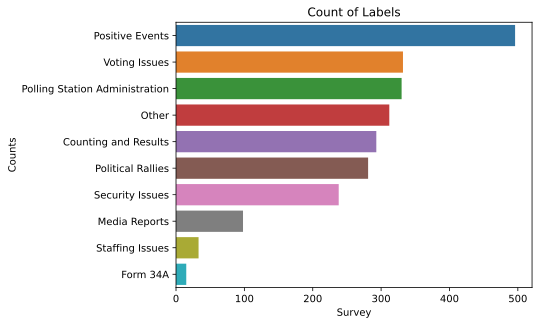

In [38]:
# Get label distribution to visualise class imbalances
# Group by survey and calculate counts for each label

grouped_counts = labelled_df.groupby("Survey").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='Survey')
plt.xlabel('Survey')
plt.ylabel('Counts')
plt.title('Count of Labels')
plt.show()

In [39]:
list(labelled_df.columns)

['Post ID',
 'Survey',
 'Post Status',
 'Created (UTC)',
 'Updated (UTC)',
 'Post Date (UTC)',
 'Contact ID',
 'Contact',
 'Unstructured Description',
 'Description',
 'Title',
 'Incident Date',
 'Location.lat',
 'Location.lon',
 'Refine Location Name',
 'Nature of this incident',
 'Image of incident',
 'Video Link',
 'Media Link',
 'Translation Status',
 'Description Translation',
 'Geolocation Status',
 'Notes',
 'Verification Status',
 'Action Taken to Verify',
 'Notes.1',
 'Escalation Status',
 'Action taken',
 'Title.1',
 'Description.1',
 'Incident date',
 'Location.lat.1',
 'Location.lon.1',
 'Refine location name',
 'Nature of this incident.1',
 'Image/Picture of incident',
 'Translation Status.1',
 'Description Translation.1',
 'Geolocation Status.1',
 'Notes.2',
 'Verification Status.1',
 'Action taken to verify',
 'Notes.3',
 'Escalation Status.1',
 'Action taken.1',
 'Title.2',
 'Description.2',
 'Incident Date.1',
 'Location.lat.2',
 'Location.lon.2',
 'Refine Location Nam

In [40]:
labelled_df = deduplicate_cols(duplicated_cols_to_be_cleaned, labelled_df)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_2813/3143249718.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dp_dict[duplicted_col_name]] = df.apply(lambda row: clean_row(row, dup_cols), axis=1)
/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_2813/3143249718.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dp_dict[duplicted_col_name]] = df.apply(lambda row: clean_row(row, dup_cols), axis=1)
/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_2813/3143249718.py:

In [41]:
labelled_df[labelled_df.Survey == 'Voting Issues'][["dp_description"]].sample(10)

,dp_description
3899,Illiterate/elderly and PWDs voters not assisted#KURIA EAST#NYABIKONGORI
4062,"Voters receiving ballots pre-marked ""rejected by IEBC"" Imara Daima polling station"
2290,Ballot boxes not sealed at start of the voting process#Kuria West#KUBWEYE PRI.
3633,"Unregistered, voting denied#KURIA EAST#IGENA ITAMBE"
4481,What happened to IEBC My name is not found and yet I deed everything that was needed for me to vote
3834,Voter impersonation
4513,Name not in IEBC register. Prevented from voting yet I have IEBC slip.
5298,Voter’s names missing from the voters register in Awendo
4942,Some voters claim not being allowed to vote due to identification issues and missing details.
1097,Purchasing of National ID cards outside polling centre/station#Cherenganyi


In [42]:
labelled_df[labelled_df.Survey == 'Counting and Results'][["dp_description"]].sample(10)

,dp_description
7534,Party agents failed to agree on rejected ballot papers#Cherenganyi
6852,Latest from Kajiado Eastl MP race as per the @IEBCKenya official results portal; #KenyaDecides \n^PK https://t.co/dWAdI3LEWO
7575,KIEMS failure to transmit electronically tallied results#KURIA EAST#KEBAROTI
8812,Presidential Election results are not going on well. I request the IEBC to ensure peaceful election by being non-partisan
8268,why are results not being announced per talling station?we are just getting results not even knowing where they are coming from which is not good.
5884,Presiding officer counted votes for each candidate in an open manner and filled out the results on tallying sheet( Form 33)#Cherengany
5543,Voting extended due to the remaining queue#cherenganyi
7779,total
7424,Tallying at migori primary polling station number 3 completed#Suna West
6500,Intimidation of counting officials and observers#Suna-East


In [43]:
labelled_df[labelled_df.Survey == 'Polling Station Administration'][["dp_description"]].sample(10)

,dp_description
1533,Please what is the best time arrive at polling station.
4198,voting resumed at 10:44am following an agreeriment between voters and IEBC officials#RONGO
1136,The limits of polling station is well demarcated and well labelled to direct voters Kuria West
1111,Number of IEBC officials and political party agents in the polling station KURIA WEST
4105,22 - Non voting materials in ballot box
6226,KIEMS failure to transmit electronically tallied results#RONGO
4763,"Mombasa county, kisauni mtopanga...perma sharp polling station.....started late past 10am....very slow....voters giving up and leaving...no agreed order of women standing on their own line"
6574,KIEMS failure to transmit electronically tallied results#Suna-East
4065,The process at Farasi Lane poling station is painfully slow. I can't see how they will deal with the numbers within the time allocated for the poll.\n(sent with Loud Effect)
3889,Voter assister not taking oath of secrecy#KURIA EAST#NYABIKONGORI


In [44]:
labelled_df[labelled_df.Survey == 'Political Rallies'][["dp_description"]].sample(10)

,dp_description
1232,Governor Samuel Ragwa:\na) Officially launched the campaigns \nb)Advised the residents not to divide themselves or disagree based on political differences
270,"President Uhuru tells Al shabaab he will bury them over Lamu attack. It was business as usual on the campaign trail for President Uhuru Kenyatta and his deputy William Ruto. They campaigned at the coast where they vowed that the government will pursue, capture, crush and bury Al Shabaab militants who have been giving residents in parts of Lamu County sleepless nights. A tough talking President also asked residents to play their part by giving crucial information, turning down requests by some leaders to lift the curfew in some parts of Tana River county."
712,Ruto assured the people that development was impacting all counties including Makueni for example Kibwezi university.
695,"Trans Nzoia Women Representative Janet Nangabo, in a meeting attended by about 400-600 people pleaded with the people to vote for Jubilee in the August 8th elections. The meeting was purposefully held to popularise the party (Jubilee) in the region."
279,"Jubilee pledged too extend the offer for subsidized fertilizer to tea farmers . Local leaders listed development initiative they believe jubilee leaders should priorities if elected. Uhuru Kenyata, William Ruto"
706,"The Jubilee's rally was attended by about 15,000 people. The main agenda of the party was to lobby for votes from the people in the region"
242,Mobilised the party’s support base to be ready to turnout in large numbers for the August election.
800,The gubernatorial aspirant said election act of 2011 should be amended to ensure presidential aspirants who fail at the shot are allowed a chance to serve in the government in another capacity.
673,NASA Principals led by Raila Odinga take their campaign in Narok county as only 5 days are remaining to the 2017 general elections
725,"Deputy President William Ruto led Jubilee campaigns in Tana River and Kilifi counties, challenging the opposition to come out clear on their agenda for the people, accusing them of confusing the public with two manifestos, while defending jubilees track record and urging residents to allow them to continue their development agenda."


In [45]:
labelled_df[labelled_df.Survey == 'Positive Events'][["dp_description"]].sample(10)

,dp_description
8479,DAILY POST‏ @TheKenyanPost \n Woman gives birth while waiting to vote and gives baby interesting name http://www.kenyan-post.com/2017/08/woman-gives-birth-while-waiting-to-vote.html …
1702,IEBC clerks arranging the room at Kapsara Primary Polling station Cherangany #ElectionsKE2017 https://t.co/DoWIaTdkM0
5287,"Peaceful votingUpigaji Kura kwa amani\nWe, at Athiru Ruujine ward have voted peacefully and no hate speech has been experienced."
4444,The electoral process being done peaceful at Chepitret polling station #Cherenganyi
5985,Presiding officer captured all rejected ballot papers on form marked ‘Rejected’#KURIA EAST#SANCHAWA
5138,Adequate voting materials
6551,Presiding officer counted votes for each candidate in an open manner and filled out the results on tallying sheet( Form 33)#RONGO
4154,"The exercise is running smoothly ,good number turnout. #KURIA EAST#KWIGENA"
4091,The election is progressing well since morning but we only have one soldier in sanchawa polling station. #KURIA EAST#SANCHAWA
1555,"Hundreds of Youths moving through the neighborhoods of Kiambu, Kangemi and Uthiru with vuvuzelas waking up people and shouting #ElectionsKE"


In [46]:
labelled_df[labelled_df.Survey == 'Staffing Issues'][["dp_description"]].sample(10)

,dp_description
5578,One of the observers was denied access to a polling station in mumiaseast Kakamega
4746,No intimidation of voters security personnel are friendly keeping law and order.#cherangany
7648,Not all agents signed since they left before counting iishe#cherenganyi
4323,There is the issue of political party agents exchanging their badges to others#KURIA EAST#WANGIRABOSE
6018,One person by the name masya King'uyu has been bribing voters over ad that angered voters.that was happening at MBA primary school at kisau mbooni constituency. Kako/waia ward.kindly tek action
4373,"Bribing of Voters at Manyatta B Centre (Komer) Polling Station (Water and Money) by a candidate ( Manyatta B Ward) Check immediately....\nWe want a Free,Fair and Credible elections!"
5229,Voter assistant not taking oath of secrecy
5092,Number of IEBC officials and political party agents in the polling station#Suna-East
4945,Voting queue\nKindly assist. Voters on one stream haven't queued as expected and nobody seems to care.
5478,Political Party agents acting in hostile manner in Cherenganyi


In [47]:
# Start work on building NB classifier and logistic classifier as baseline models

## Data Cleaning and Preprocessing

In [48]:
# Remove any duplicated reports - check for any duplicates
# Remove stop words
# Remove links 
# Remove #hashatags  or @username
# Remove retweets

In [49]:
"""
Remove duplicated tweets
1. Tokenization - break down words based on spaces
2. Lowercasing - convert all the tokens to lowerspaces
3. Stopwords- remove all occurences of stop words
4. Convert emoticons to words 
5. Hashtags and mentions - retaining hashtags but removing the #
6. URL - removed or replaced with URL - typically do not provide any info for classification
7. Removing special characters and punctuation 
"""

'\nRemove duplicated tweets\n1. Tokenization - break down words based on spaces\n2. Lowercasing - convert all the tokens to lowerspaces\n3. Stopwords- remove all occurences of stop words\n4. Convert emoticons to words \n5. Hashtags and mentions - retaining hashtags but removing the #\n6. URL - removed or replaced with URL - typically do not provide any info for classification\n7. Removing special characters and punctuation \n'

In [50]:
# Create a basic Naive Bayes Model for baseline / Linear Regression
# Choose a more complex model - like multilingual BERT coupled with active learning

In [51]:
labels = ['Opinions', 'Political Rallies', 'Positive Events', 'Security Issues',
       'Voting Issues', 'Counting and Results', 'Staffing Issues', 'Polling Station Administration']

In [52]:
len(published_df)

16220

In [53]:
published_df.head()

,Post ID,Survey,Post Status,Created (UTC),Updated (UTC),Post Date (UTC),Contact ID,Contact,Data Source ID,Source,...,Checkbox(es),dp_title,dp_description,dp_location_lat,dp_location_long,dp_nature_of_this_incident,dp_verificiation_status,dp_media_source,dp_translation_status,dp_description_translation
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,Polling Station Administration,published,2022-06-27 13:47:09,2022-08-02 21:37:34,2022-06-27 13:45:01,1.0,1.146125e+18,1541417316273246208.0,twitter,...,NaN,Nominated Senator Beth Mugo requests IEBC to consider those with fingerprint insensitivity in the August 9.,https://twitter.com/1146124540055052289/status/1541417316273246208,-1.303169,36.826061,Polling station logistical issues,"Verification, Verified, No need for verification",NaN,"Translation, No need for translation",NaN
3,6.0,Polling Station Administration,archived,2022-06-27 13:47:09,2022-06-27 13:59:36,2022-06-27 13:25:51,2.0,1.510781e+18,1541412494526259200.0,twitter,...,NaN,Nominated Senator Beth Mugo requests IEBC to consider those with fingerprint insensitivity in the August 9.,https://twitter.com/1510781350902706180/status/1541412494526259202,-1.283253,36.817245,Polling station logistical issues,"Verification, Verified",NaN,"Translation, No need for translation",NaN
631,634.0,Opinions,published,2022-07-05 05:09:03,2022-08-03 10:04:14,2022-07-05 05:08:29,24.0,7.691318e+17,1544186432301957120.0,twitter,...,NaN,YOUTH PARTICIPATION IN THE GENERAL ELECTIONS .,"Elections are coming. Youths should turn up,vote and Preach peace before, during and after the Elections. We can never be used and divided for selfish Political Interests.",-1.283253,36.817245,Peace messages,"Verification, No need for verification","Media Stream Source, Twitter","Translation, No need for translation",NaN
634,637.0,Opinions,published,2022-07-05 05:17:07,2022-08-05 06:25:38,2022-07-05 05:16:28,159.0,5.974236e+08,1544188438773207040.0,twitter,...,NaN,VOTER EDUCATION AMONG THE YOUTH.,"It is important for youths to understand the election and voting processes, their role in the processes and how to ensure that peace is maintained even after elections.",-1.303264,36.826384,Peace messages,"Verification, Verified","Media Stream Source, Twitter","Translation, No need for translation",NaN


In [184]:
data_df = published_df[published_df['Survey'].isin(labels)]

In [185]:
# Length of data after filtering out labels
len(data_df)

12374

In [186]:
list(data_df.columns)

['Post ID',
 'Survey',
 'Post Status',
 'Created (UTC)',
 'Updated (UTC)',
 'Post Date (UTC)',
 'Contact ID',
 'Contact',
 'Data Source ID',
 'Source',
 'Unstructured Description',
 'Title',
 'Description',
 'Incident date',
 'Location.lat',
 'Location.lon',
 'Refine Location Name',
 'Nature of this incident',
 'Image of incident',
 'Video Link',
 'Media Link',
 'Translation Status',
 'Description Translation',
 'Geolocation Status',
 'Notes',
 'Verification Status',
 'Action Taken to Verify',
 'Notes.1',
 'Escalation Status',
 'Action taken',
 'Media Stream Source',
 'Title.1',
 'Description.1',
 'Incident date.1',
 'Location.lat.1',
 'Location.lon.1',
 'Refine location name',
 'Nature of this incident.1',
 'Image/Picture of incident',
 'Video Link.1',
 'Media Link.1',
 'Translation Status.1',
 'Geolocation Status.1',
 'Notes.2',
 'Verification Status.1',
 'Action taken to verify',
 'Notes.3',
 'Escalation Status.1',
 'Action taken.1',
 'Media source',
 'Title.2',
 'Description.2',
 '

In [188]:
data_df['dp_nature_of_this_incident'].unique()

array(['Polling station logistical issues', 'Peace messages',
       'Positive Opinions', 'Neutral', nan,
       'Violent Attacks, Armed Clashes, Riots, Vandalism and Physical Attacks on Property, Sexual and Gender Based Violence, Eviction/Population displacement, Mobilisation towards violence, Presence of weapons',
       'Negative opinions', 'Voter registration irregularities',
       'Voter Integrity Irregularities', 'Voting Irregularities',
       'Provisional Citizen Results', 'Personal Opinion',
       'Protest over declared results', 'Police brutality',
       'Violent Attacks', 'Abductions/kidnapping', 'Demonstrations',
       'Riots', 'Personal Opinion, Neutral', 'Dangerous Speech',
       'Counting Irregularities', 'Unofficial proclamation of results',
       'Alleged Rigging', 'Official IEBC results',
       'Ballot Box Irregularities', 'Neutral, Personal Opinion',
       'Personal Opinion, Negative opinions', 'Rumors',
       'Rumors, Mobilisation towards violence, Dangerou

In [189]:
data_df[["Post ID","Survey","dp_description","Source", "Post Date (UTC)",  'dp_title',
 'dp_location_lat',
 'dp_location_long',
 'dp_nature_of_this_incident',
 'dp_verificiation_status']].sample(10)

,Post ID,Survey,dp_description,Source,Post Date (UTC),dp_title,dp_location_lat,dp_location_long,dp_nature_of_this_incident,dp_verificiation_status
8205,62213.0,Opinions,"Easy everyone. Chebukati has till Tuesday to announce. Those who loaded fake 34As into the system & are putting pressure on media houses to announce, mumepatikana! Kiems Kit turnout must match 34A turnout. In one region it is 55% in Kiems Kit & 65% for 34A. Drain the ukora!",twitter,2022-08-12 13:26:44,Media Houses Being Pressured To Announce The Presidential Candidate Winner,-1.188155,36.839888,Neutral,"Verification, Unverified"
72553,20594.0,Opinions,Because they have confidence in IEBC..,twitter,2022-07-26 16:51:06,UDA Has Confidence In IEBC!,-1.283253,36.817245,Positive Opinions,"Verification, Verified"
54168,24176.0,Staffing Issues,The people calling people happens to be one IEBC STEM officer who doubles up as Narok west constituency deputy manager among others. @IEBCKenya and @DCI_Kenya should move up in speed to stop this emancipated agony. @ItsMutai call ground huko home bana usikie vile kura inapangwa..,twitter,2022-07-29 11:01:41,IEBC JOBS SAGA,-1.277937,35.477423,Absence or insufficient number of law enforcement officials at Polling Station,"Verification, No need for verification"
11006,65014.0,Opinions,Delayed vote result is straining Kenya both home and abroad. Most diplomacy related engagements and bilateral collaborations are hampered,twitter,2022-08-13 04:57:52,DELAYED VOTING,-1.119390,36.758256,Personal Opinion,"Verification, Verified"
98273,46342.0,Opinions,"In the weeks leading up to today's elections in Kenya, political violence events increased by 40% compared to the weekly average for the past year",twitter,2022-08-09 15:00:00,Political violence events increased by 40% compared to the weekly average for the past year,-1.292066,36.821946,Negative opinions,"Verification, No need for verification"
72487,20528.0,Opinions,You are barking every time. If you don’t trust IEBC pull out from senatorial seats,twitter,2022-07-26 16:11:57,If You Don't Trust IEBC Pull Out!,-1.283253,36.817245,Negative opinions,"Verification, Verified"
74070,22111.0,Opinions,"True, They wanted to use themto generate fake results. Again had omitted Form 34Bs which clearly stated in Law! Why create backoffice in transmission line of results instead of direct to IEBC server. Backoffice is where doctoring was to be done then transmitted to RO to fill 34Bs",twitter,2022-07-28 05:31:56,WHY CREATE A BACK OFFICE IN TRANSMISSION OF RESULTS,-1.276025,36.770931,Positive Opinions,"Verification, Verified"
52516,2546.0,Opinions,Everyone deserves peace. Peace is within us and no one can give you peace.\n#RadaNiPeace\n#ElectionBilaNoma\n@KenyaYwca \n@central_ymca,twitter,2022-07-15 13:37:18,PEACE DIALOGUE,-1.286078,37.181401,Positive Opinions,"Verification, No need for verification"
89243,37310.0,Opinions,#GE2022 Campaigning ended on 6/08/2022.\nThe way Media houses covered the whole campaign seemed satisfying.Zeen?\n\nFew years latter cries of #PressFreedom Gweh!,twitter,2022-08-06 18:24:46,The media did a good job covering the campaigns .,-1.283253,36.817245,Positive Opinions,"Verification, No need for verification"
53370,3405.0,Opinions,"When the BackOffice App receives the results, it processes the information. At this point, the Returning officer gets the chance to connect with the BackOffice App, and view the processed reports. Also, the BackOffice app shares the results with the Tally Centers.",twitter,2022-07-20 07:06:16,BackOffice App,-1.232090,36.883804,Positive Opinions,"Verification, Verified"


In [190]:
cols_of_interest = ["Survey","dp_description","Source","Post ID", "Data Source ID"]

In [191]:
data_df = data_df[cols_of_interest]

In [192]:
# Rename columns for ease of reference and use
data_df.columns = ["label", "text", "source", "id", "data_source_id"]

In [193]:
data_df.head()

,label,text,source,id,data_source_id
1,Polling Station Administration,https://twitter.com/1146124540055052289/status/1541417316273246208,twitter,4.0,1541417316273246208.0
3,Polling Station Administration,https://twitter.com/1510781350902706180/status/1541412494526259202,twitter,6.0,1541412494526259200.0
631,Opinions,"Elections are coming. Youths should turn up,vote and Preach peace before, during and after the Elections. We can never be used and divided for selfish Political Interests.",twitter,634.0,1544186432301957120.0
634,Opinions,"It is important for youths to understand the election and voting processes, their role in the processes and how to ensure that peace is maintained even after elections.",twitter,637.0,1544188438773207040.0
635,Opinions,"Elections are coming. Youths should turn up,vote and Preach peace before, during and after the Elections. We can never be used and divided for selfish Political Interests.",twitter,638.0,1544190162770567168.0


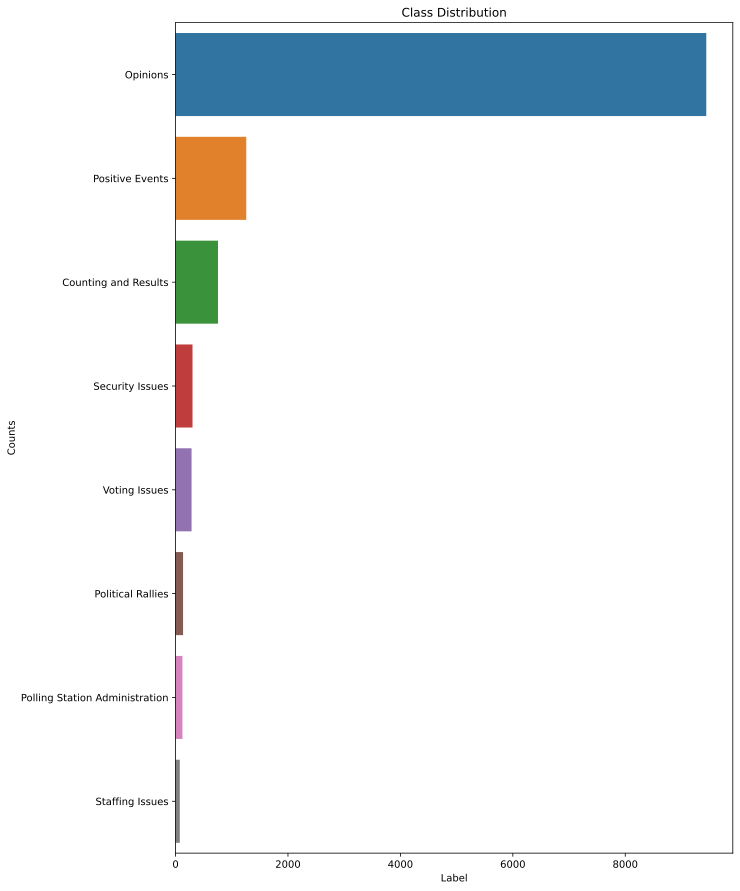

In [194]:
# Get label distribution to visualise class imbalances
# Group by survey and calculate counts for each label

grouped_counts = data_df.groupby("label").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='label')
plt.xlabel('Label')
plt.ylabel('Counts')
plt.title('Class Distribution')
plt.show()

From the plot above, there is a clear data imbalance, next would be to merge related labels into one label i.e. Polling Station Administration, Staffing Issues, Voting Issues into one label

In [195]:
data_df["merged_label"] = data_df['label'].replace({'Counting and Results':"Voting Issues",
'Polling Station Administration':"Voting Issues",'Staffing Issues':"Voting Issues", "Voting Issues":"Voting Issues"})

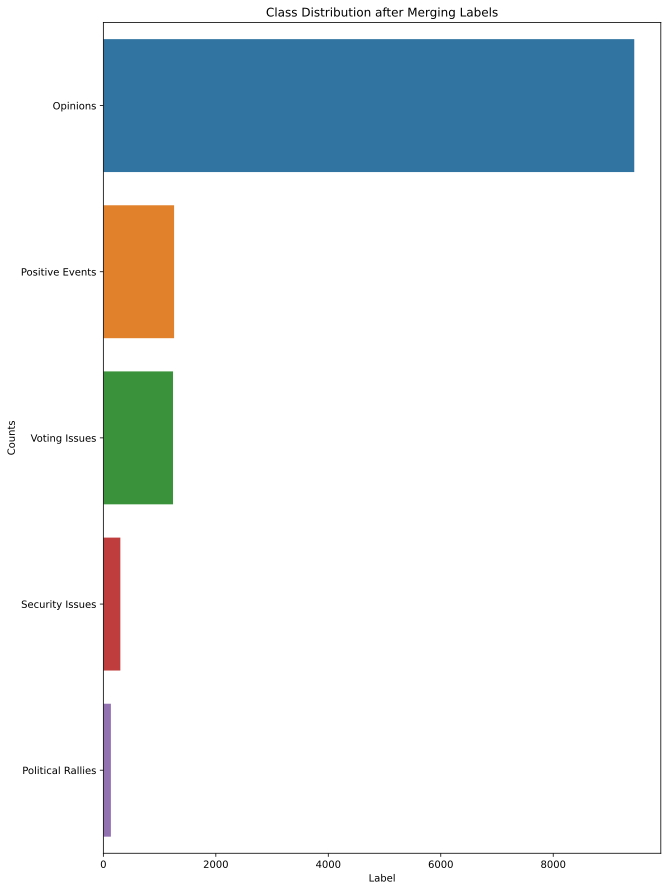

In [196]:
# Get label distribution to visualise class imbalances
# Group by survey and calculate counts for each label

grouped_counts = data_df.groupby("merged_label").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='merged_label')
plt.xlabel('Label')
plt.ylabel('Counts')
plt.title('Class Distribution after Merging Labels')
plt.show()

Clean any duplicates in the data that may affect model performance

In [197]:
# Full Duplicates - tweet and label are the same
duplicates = data_df.duplicated(["text","label"])
print(f"Full duplicates: {len(duplicates[duplicates == True])}")

# Duplicate tweets that have different labels
duplicates = data_df.duplicated(["text"])
print(f"Duplicates with different labels: {len(duplicates[duplicates == True])}")

Full duplicates: 457
Duplicates with different labels: 566


In [198]:
# Count the number of tweets before dropping
print(f"The number of tweets before dropping duplicates is {len(data_df)}")

# Drop the full duplicates
cleaned_df = data_df.drop_duplicates(subset=["text"])
print(f"The number of tweets after dropping duplicates is {len(cleaned_df)}")

The number of tweets before dropping duplicates is 12374
The number of tweets after dropping duplicates is 11808


Removed duplicated election reports remaining with 11,808 labelled posts

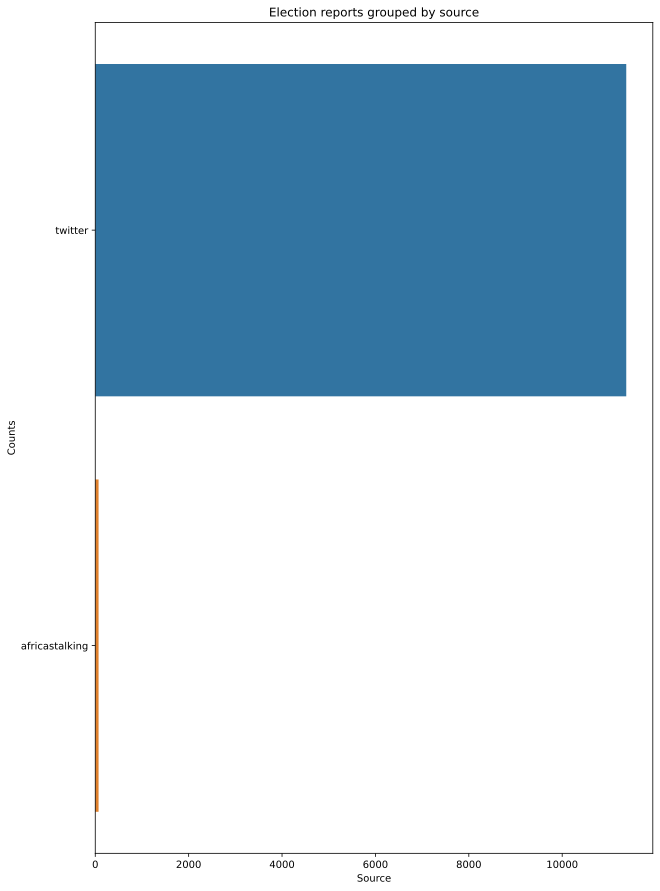

In [199]:
# Look at the source distribution of the reports
grouped_counts = cleaned_df.groupby("source").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='source')
plt.xlabel('Source')
plt.ylabel('Counts')
plt.title('Election reports grouped by source')
plt.show()

In [200]:
cleaned_df[data_df.source == 'africastalking'][["label","text"]].sample(10)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_2813/2771762932.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df[data_df.source == 'africastalking'][["label","text"]].sample(10)


,label,text
82777,Political Rallies,Why did our president fall out with his deputy and started campaigning for Raila instead of his own deputy
88278,Security Issues,Insecurity in kisumu county
80761,Voting Issues,Where do i vote
80869,Opinions,I forsee a calm situation in our country after the upcoming elections
80765,Voting Issues,Nayali pangu pa kupigia kura
79066,Positive Events,the situation around here is very fine
95470,Polling Station Administration,Police denying entry to observers in Kyambiu social hall ..Eastleigh North.purporting they were late
95480,Staffing Issues,Police denying entry to observers in Kyambiu social hall ..Eastleigh South. Purporting they were late.
95958,Positive Events,"I had a great experience at Greenspan polling center in Embakasi, Nairobi. Officials were fast, efficient, knowledgeable, organized, relaxed, and friendly. Thankful it was a no-stress affair."
97173,Positive Events,I'm gabra from Kikuyu. Here at Kikuyu we are voting peacefully


In [201]:
cleaned_df.shape

(11808, 6)

In [202]:
# Get a sense of the text data before choosing appropriate text preprocessing steps

In [203]:
cleaned_df[["text","label"]].sample(50)

,text,label
26794,"12 million people will determine the fate of 50 million kenyans for the next 5 years; and I'm certain the 10m who didn't vote are the most active political commentators on twitter, the best you can do next time is change your polling station to next to your present residence,",Opinions
50686,IEBC is displaying over 46k form 34A to the whole world to see...hapa ukishindwa weka mikono juu na uende nyumban,Opinions
60987,#ChebukatiResign \n and his masters are striking the matchstick to burn Kenya foolishly thinking that the fire will spare them to enjoy their loot.,Opinions
54226,He is hard pressed,Political Rallies
11040,"This account should be suspended we need to report massively. You cannot keep creating a perception to Kenyans, you've now slowed your fake results so that we continue visiting your page . REPORT this account",Opinions
75780,"If you are an IEBC Officer and there is something that someone has eaten (yes, help him with the rigging), say (that thing), we are not too late as a country. Do justice"". @MarthaKarua in #MarthSpeaksToTheMountain.",Opinions
72359,We need them to tell us how they will solve unemployment.,Opinions
6801,IEBC at Bomas should Audit High Rejected Vote Numbers(28) in some areas and instances where ONLY one Party Agent signed Form 34A #KenyaDecides2022,Opinions
53297,"Earlier today #NCIC Comm'r Hon. Philip Okundi paid a courtesy call to the Homabay County Commissioner Mr. Moses K Lilac, where they deliberated on the state of Peace in the region as the country draws close to the August polls. #ElectionsBilaNoma #LetPeaceWin",Opinions
71699,"Chebukati is responsible for the PEV, I am patriotic, but Chebukati must be held accountable for the mess already happened in the undone election on 9/8/2022",Opinions


In [204]:
# Presence of a lot of line breaks in the text i.e. - \n
# Use of hashtags - #KenyaDecides #KenyaElections
# Repeated punctuation marks - lots of punctuation marks
# Use of swahili words - code switching 
# Use of short text acronyms - 'Whatever you do manually , u need to do the same in the technology to cover up & vice versa.'
# Repeated punctuation 
# Should i treat numbers with percentage and everything else differently - not so sure

In [205]:
with open('2022_tweets.json', 'r') as file:
    data = file.readlines()

In [206]:
json_data = [json.loads(line) for line in data]

In [859]:
# Load all the tweets from the dataset
tweets_df = pd.DataFrame(json_data)

In [860]:
tweets_df[["id","full_text"]].head()

,id,full_text
0,1542066997332254720,Electionsbilanoma - youths championing for a peaceful election @AlbaHotelMeru #UchaguziWaAmani
1,1541790262673956864,Bring it on #ToryFascists #GE2022 https://t.co/1sTwlMUSNo
2,1542066727613341696,"""We the youth are actively fighting for peace in this coming Election.\n\nAnd the first step we taking is teaching our peers.""\n~@YEDNetworkKe SG-@MOHA_made_ \n@RoySasaka @IEBCKenya @SWJacksonUN @IEBC_YCC\n@UNDPKenya \n#UchaguziWaAmani\n#GE2022 https://t.co/0rbBaW3kyJ https://t.co/joVlHJ2Bsb"
3,1542052786547875840,"We expect the participants of the ongoing youth voter education training, including upper Eastern region,to leverage on their leadership skills to enlighten other youth and the public on electoral process and preach #peace.\n\n#UchaguziWaAmani\n#GE2022 https://t.co/jFH4mj8Du6"
4,1541706452221534208,@Bomasofkenya @IEBCKenya CEO Marjan Hussein Marjan says the National Planning Meeting is key in the execution of the Commission's responsibilities and will discuss and resolve challenges previously faced by officials in conduct and management of elections #GE2022 https://t.co/SdNyUjBzWd


In [888]:
value = tweets_df.loc[tweets_df['id'] == 1541417316273246208, 'full_text']

In [907]:
value = tweets_df.loc[tweets_df['id'] == 1541417316273246208, 'full_text'].item()

In [908]:
print(value)

Nominated Senator Beth Mugo requests IEBC to consider those with fingerprint insensitivity in the August 9.
#dmmaxupdates #GE2022 https://t.co/SymCO4PxRm


In [916]:
def get_orig_tweet(row, tweets_df):
    if row["source"] == 'twitter':
        source_id = int(row['data_source_id'])
        tweet_text = pd.NA
        value = tweets_df.loc[tweets_df['id'] == source_id, 'full_text']
        if len(value) != 0:
            tweet_text = value.item()
        
        return tweet_text

In [917]:
# Compare tweet text from tweets collected
data_df["compare_text"] = data_df.apply(lambda row: get_orig_tweet(row, tweets_df), axis=1)

In [918]:
data_df["compare_text"].isnull().sum()

7820

In [920]:
data_df.sample(10)

,label,text,source,id,data_source_id,merged_label,compare_text
54232,Opinions,With just under 10 days to election we urge all Kenyans to maintain peace. We are one. We joined IEBC at OLD TOWN In their quest to educate the masses on how to vote so as not to have spoilt votes...,twitter,24240.0,1.552987e+18,Opinions,<NA>
56070,Opinions,'No Uhuru Kenyatta insults' -Azimio demands ahead of Raila-Ruto presidential debate - via Nation Africa\n\nAma these are the excuses wameanza to divert attention from intimidations of iebc and planned rigging!,twitter,4111.0,1.550572e+18,Opinions,<NA>
69020,Positive Events,"To transform our Nation in a sustainable manner, we need everyone onboard. \n\nThe Azimio Administration will include all groups that want to contribute to our drive for a better Kenya.",twitter,17061.0,1.551662e+18,Positive Events,<NA>
63430,Security Issues,"CHEBUKATI & DP. RUTO want Kenya to BURN. Post 2007/08 elections violence the sky news documentary on Mungiki & The place of Uhuru in Mt Kenya leadership,was Undesputed,a lady said if any1 touched Uhuru Kenya would BURN,to the ground. @IEBCKenya know this isn't business as usual.",twitter,11471.0,1.551193e+18,Security Issues,"CHEBUKATI &amp; DP. RUTO want Kenya to BURN. Post 2007/08 elections violence the sky news documentary on Mungiki &amp; The place of Uhuru in Mt Kenya leadership,was Undesputed,a lady said if any1 touched Uhuru Kenya would BURN,to the ground. @IEBCKenya know this isn't business as usual."
93373,Opinions,"@MichaelWandati\n·\nFollow\nHours to August 9, #Kenya polls, electoral body IEBC says ballot papers for Kakamega and Mombasa gubernatorial candidates had errors.\n\nElections suspended in the two counties, date to be announced later through a gazette notice",twitter,41442.0,1.556655e+18,Opinions,<NA>
53158,Positive Events,Joined chairman @YEDNetworkKe on a voters sensitization programme by @IEBCKenya in Kisauni constituency,twitter,3193.0,1.548995e+18,Positive Events,Joined chairman @YEDNetworkKe on a voters sensitization programme by @IEBCKenya in Kisauni constituency \n@USAIDKenya @jafartupi @MOHA_made_ \n#UchaguziwaAmani https://t.co/G8MsQya1dG
6867,Opinions,"SOMETHING don't ADD UP: If Voter TURN OUT in Mt Kenya was VERY LOW, what EXPLAINS the 49% Raila; 49% Ruto in MEDIA? This BEATS scientific LOGIC. If Azimio SLEEPS through Bomas, TABLES will TURN. Remember: Mkokoteni has only ONE WHEEL. Don't be LAZY at Bomas. #kenyaelections2022",twitter,60875.0,1.557998e+18,Opinions,@MutahiNgunyi Go to IEBC portal download forms and tally results prof don't be lazy
71185,Opinions,So who between Ruto and IEBC is supposed to answer queries on these kits? UDA is the one defending and answering questions from Kinoti... This thing stinks from here to Timbuktu,twitter,19226.0,1.551864e+18,Opinions,@lindahoguttu @IEBCKenya So who between Ruto and IEBC is supposed to answer queries on these kits? UDA is the one defending and answering questions from Kinoti... This thing stinks from here to Timbuktu
82428,Opinions,Level of confidence in electoral body IEBC among supporters of the four presidential candidates. #TIFAPresidentialPoll2022,twitter,30478.0,1.554793e+18,Opinions,Level of confidence in electoral body IEBC among supporters of the four presidential candidates. #TIFAPresidentialPoll2022 https://t.co/7uPmkdvYKp
74006,Opinions,o\n·\nFollow\nChebukati! CHEBUKATI!.... Why do you want to burn this country? God is seeing you and your every evil move is detected. Just give up!,twitter,22047.0,1.552516e+18,Opinions,<NA>


In [945]:
train_df, test_df = train_test_split(cleaned_df, test_size=0.20)

In [946]:
# Convert the labels of the 
from sklearn.preprocessing import LabelEncoder  

labeler = LabelEncoder()
train_df["target"] = labeler.fit_transform(train_df["merged_label"])
test_df["target"] = labeler.transform(test_df["merged_label"])

In [951]:
mapping = dict(zip(labeler.classes_, range(len(labeler.classes_))))
print(mapping)

{'Counting and Results': 0, 'Opinions': 1, 'Political Rallies': 2, 'Positive Events': 3, 'Security Issues': 4, 'Voting Issues': 5}


In [211]:
train_cts = train_df.groupby("target").size()
test_cts  = test_df.groupby("target").size()

Text(0, 0.5, 'Counts')

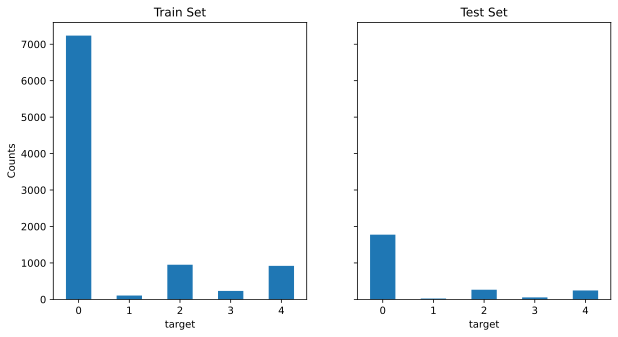

In [212]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
train_cts.plot(kind='bar',ax= ax1,rot=0)
test_cts.plot(kind='bar',ax= ax2,rot=0)
ax1.set_title('Train Set')
ax2.set_title('Test Set')
ax1.set_ylabel("Counts")

In [213]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(df: pd.DataFrame, category: str, target: int) -> None:
    words = " ".join(df[df["target"] == target]["text"].values)

    plt.rcParams['figure.figsize'] = 10, 15
    wordcloud = WordCloud(stopwords=STOPWORDS, 
                          background_color="white",
                          max_words=1000).generate(words)

    plt.title("WordCloud For {}".format(category))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    

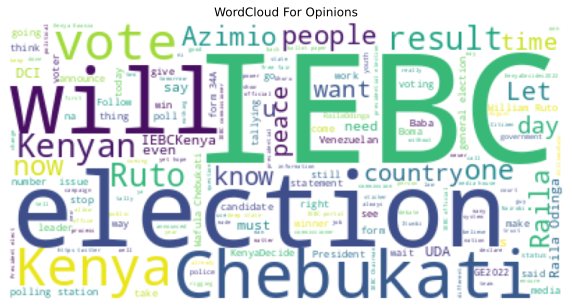

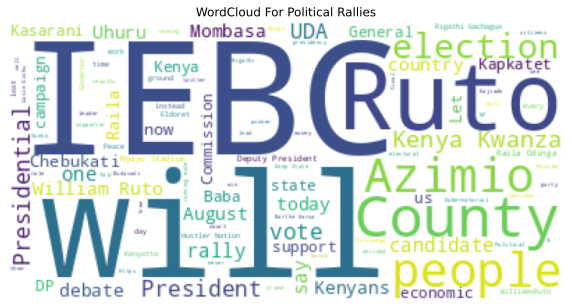

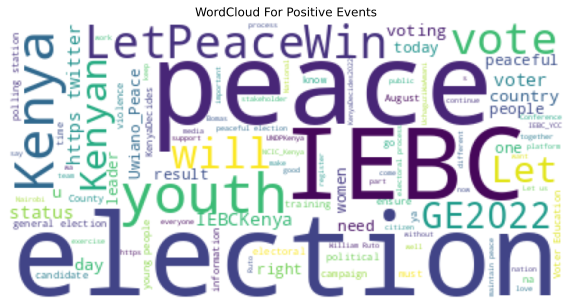

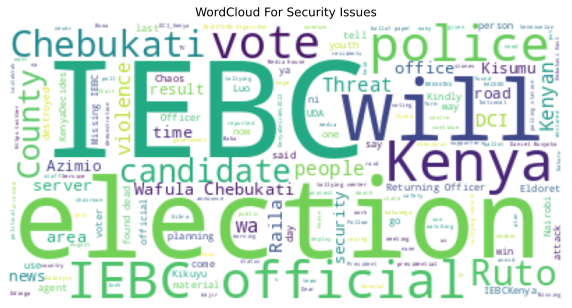

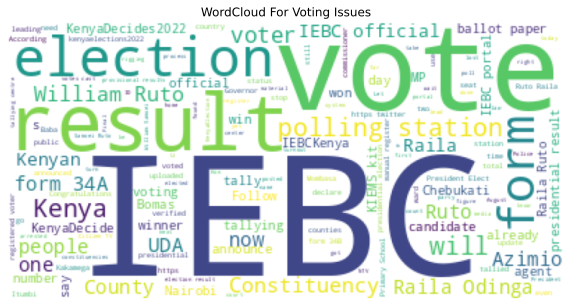

In [214]:
for category, target in mapping.items():
    plot_wordcloud(train_df, category, target)

In [215]:
from sklearn.feature_extraction.text import CountVectorizer

In [216]:
count_vect = CountVectorizer(stop_words=list(STOPWORDS))

X_train_tf = count_vect.fit_transform(train_df["text"])

print("Shape of term-frequency matrix:", X_train_tf.shape)

Shape of term-frequency matrix: (9446, 17886)


/Users/jabez/Documents/NLP/nlp-summative/.conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [217]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_tf)

In [218]:
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=count_vect.get_feature_names_out(),columns=["idf_weights"]) 

# sort ascending 
df_idf.sort_values(by=['idf_weights']).head(20)

,idf_weights
iebc,1.714221
will,2.964285
election,2.982564
chebukati,3.009045
kenya,3.159520
ruto,3.198814
elections,3.202638
results,3.322578
raila,3.481420
kenyans,3.748224


In [219]:
features = count_vect.get_feature_names_out()

In [220]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [221]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [222]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [223]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [224]:
top_mean_feats(X_train_tfidf, features)

,feature,tfidf
0,chebukati,0.015509
1,will,0.015378
2,iebc,0.015108
3,election,0.014530
4,results,0.014488
5,ruto,0.013166
6,elections,0.013100
7,kenya,0.012676
8,peace,0.011988
9,raila,0.011105


In [225]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [226]:
def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(16, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        # ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title(str(df.label), fontsize=10)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

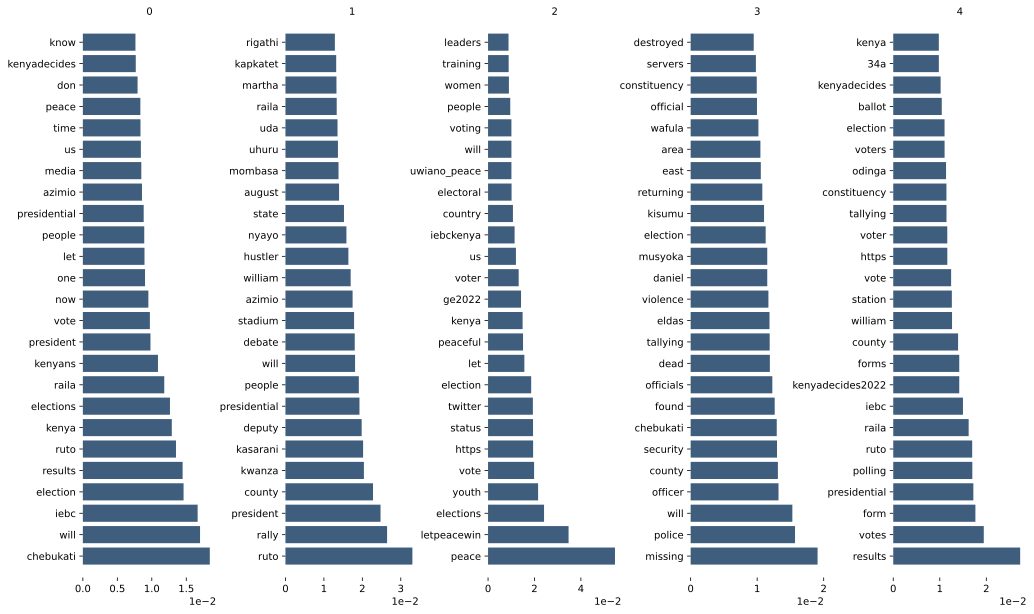

In [227]:
plot_tfidf_classfeats_h(top_feats_by_class(X_train_tfidf, train_df['target'], features))

In [229]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

model = MultinomialNB(alpha=1)
model.fit(X_train_tfidf, train_df["target"])

MultinomialNB(alpha=1)

In [230]:
X_test_tf = count_vect.transform(test_df["text"])
X_test_tfidf = tfidf_transformer.transform(X_test_tf)

predicted = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(test_df["target"], predicted))

Accuracy: 0.7548687552921253


In [231]:
from sklearn.metrics import classification_report

print(classification_report(test_df["target"],
                            predicted, 
                            target_names=mapping))

                   precision    recall  f1-score   support

         Opinions       0.75      1.00      0.86      1776
Political Rallies       0.00      0.00      0.00        23
  Positive Events       1.00      0.02      0.04       264
  Security Issues       0.00      0.00      0.00        54
    Voting Issues       0.67      0.01      0.02       245

         accuracy                           0.75      2362
        macro avg       0.48      0.21      0.18      2362
     weighted avg       0.75      0.75      0.65      2362



/Users/jabez/Documents/NLP/nlp-summative/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jabez/Documents/NLP/nlp-summative/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jabez/Documents/NLP/nlp-summative/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [241]:
from sklearn.preprocessing import label_binarize
import numpy as np

# get the number of classes
n_classes = len(train_df["target"].unique())

# classes = [0,1,2,3]
classes   = np.sort(train_df["target"].unique())

# relabel the test set
y_true = label_binarize(test_df["target"], 
                        classes=classes)

In [233]:
y_pred = model.predict_proba(X_test_tfidf)

In [239]:
y_pred[:2]

array([[8.77908885e-01, 4.08491523e-04, 1.24965046e-02, 1.34502308e-03,
        1.07841096e-01],
       [9.97228278e-01, 3.85784482e-05, 1.53192480e-03, 8.95207984e-05,
        1.11169770e-03]])

In [240]:
test_df.head(2)

,label,text,source,id,data_source_id,merged_label,target
99347,Voting Issues,"In Kisumu, Kisumu Central, Kondele, Kondele Markets tent 1, Total Number of Votes cast is higher than total voters .@OleItumbi #ElectionsKe #KenyaDecides2022",twitter,47416.0,1557086504102645763,Voting Issues,4
74034,Opinions,"Just because there's handshake and Uhuru shook hands with Raila : does not mean he's part of the government (Raila). Those in government is Uhuru & Ruto. They were to work as team. It didn't happen. They messed up, let's give another government a chance : Raila.\nThat Luo Doc\n@JeffDoc_",twitter,22075.0,1552521434630610949,Opinions,0


In [259]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


def plot_roc(y_true, y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot ROC curves for each class
    plt.figure()
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(i, roc_auc[i]))

    # Add diagonal line for reference
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

    # Set plot properties
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


In [245]:
from sklearn.metrics import balanced_accuracy_score

print("balanced_accuracy", balanced_accuracy_score(test_df["target"], 
                                                   predicted))

balanced_accuracy 0.20606549499406643


In [236]:
from sklearn.metrics import f1_score

print("weighted f1 score:", f1_score(test_df["target"], 
                                     predicted, 
                                     average="weighted"))

weighted f1 score: 0.653107800837343


In [237]:
from sklearn.pipeline import Pipeline

nb_pipe1 = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('model', MultinomialNB())])

model = nb_pipe1.fit(train_df["text"], train_df["target"])

pred  = model.predict(test_df["text"])

print(classification_report(test_df["target"],
                            pred, 
                            target_names=mapping))

                   precision    recall  f1-score   support

         Opinions       0.76      1.00      0.86      1776
Political Rallies       0.00      0.00      0.00        23
  Positive Events       1.00      0.02      0.04       264
  Security Issues       0.00      0.00      0.00        54
    Voting Issues       0.71      0.02      0.04       245

         accuracy                           0.76      2362
        macro avg       0.49      0.21      0.19      2362
     weighted avg       0.75      0.76      0.66      2362



/Users/jabez/Documents/NLP/nlp-summative/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jabez/Documents/NLP/nlp-summative/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jabez/Documents/NLP/nlp-summative/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [941]:
from imblearn.pipeline       import Pipeline 
from sklearn.model_selection import cross_validate
from imblearn.over_sampling  import RandomOverSampler
import numpy as np
from sklearn.metrics import precision_score

nb_pipe2  = Pipeline([('vect',    CountVectorizer()),
                     ('tfidf',   TfidfTransformer()),
                     ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',   MultinomialNB())])

In [942]:
def evaluate_model(
    train_df : pd.DataFrame,
    test_df  : pd.DataFrame,
    mapping  : dict,
    pipe     : Pipeline,
) -> None:

    model = pipe.fit(train_df["text"], 
                     train_df["target"])


    pred  = model.predict(test_df["text"])

    print(classification_report(test_df["target"],
                                pred, 
                                target_names=mapping))
    
    print("weighted f1 score:", f1_score(test_df["target"], 
                                     predicted, 
                                     average="weighted"))
    print("balanced_accuracy", balanced_accuracy_score(test_df["target"], 
                                                       pred))
    

In [943]:
from functools import partial

evaluate_pipeline = partial(evaluate_model,
                            train_df,
                            test_df,
                            mapping)

In [944]:
evaluate_pipeline(nb_pipe2)

ValueError: Number of classes, 5, does not match size of target_names, 6. Try specifying the labels parameter

In [343]:
y_pred = nb_pipe2.predict_proba(test_df["text"])

In [345]:
print("roc_auc_score", roc_auc_score(test_df["target"], y_pred, multi_class='ovr'))

roc_auc_score 0.8054816526224329


In [346]:
from sklearn.metrics import precision_recall_fscore_support

In [274]:
def plot_roc(y_true, y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot ROC curves for each class
    plt.figure()
    colors = cycle(['blue', 'red', 'green', 'orange',  'black'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(i, roc_auc[i]))

    # Add diagonal line for reference
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

    # Set plot properties
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

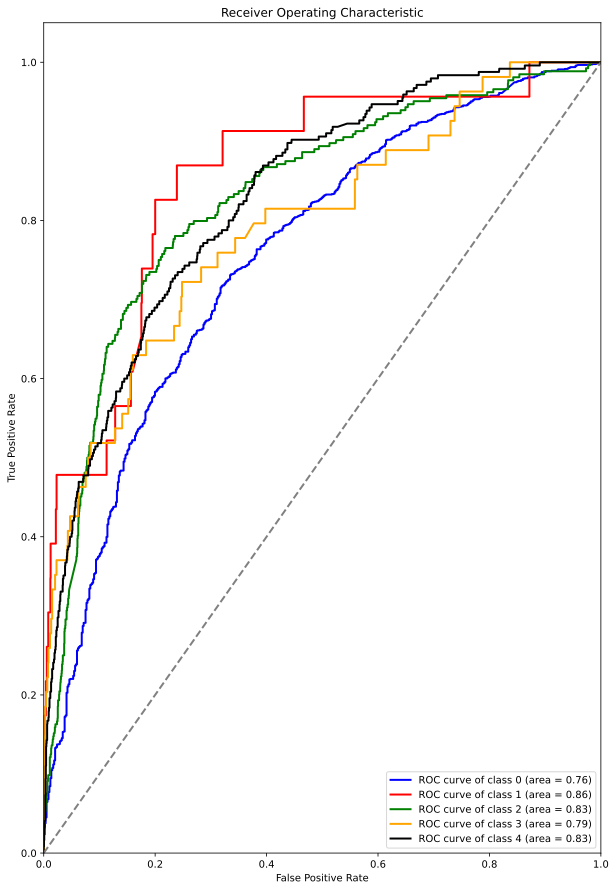

In [275]:
plot_roc(y_true, y_pred)

In [276]:
mapping

{'Opinions': 0,
 'Political Rallies': 1,
 'Positive Events': 2,
 'Security Issues': 3,
 'Voting Issues': 4}

In [265]:
from sklearn.svm import LinearSVC

svm_pipe1 = Pipeline([('vect',    CountVectorizer()),
                      ('tfidf',   TfidfTransformer()),
                      ('model',   LinearSVC(random_state=50))])

evaluate_pipeline(svm_pipe1)

                   precision    recall  f1-score   support

         Opinions       0.81      0.94      0.87      1776
Political Rallies       0.67      0.09      0.15        23
  Positive Events       0.58      0.31      0.41       264
  Security Issues       0.67      0.15      0.24        54
    Voting Issues       0.51      0.30      0.38       245

         accuracy                           0.77      2362
        macro avg       0.65      0.36      0.41      2362
     weighted avg       0.75      0.77      0.74      2362


balanced_accuracy 0.35665372075309965


In [268]:
svm_pipe2 = Pipeline([('vect',   CountVectorizer()),
                     ('tfidf',   TfidfTransformer()),
                     ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',   LinearSVC(random_state=50))])

evaluate_pipeline(svm_pipe2)

                   precision    recall  f1-score   support

         Opinions       0.83      0.79      0.81      1776
Political Rallies       0.27      0.17      0.21        23
  Positive Events       0.40      0.49      0.44       264
  Security Issues       0.38      0.24      0.30        54
    Voting Issues       0.32      0.41      0.36       245

         accuracy                           0.70      2362
        macro avg       0.44      0.42      0.42      2362
     weighted avg       0.72      0.70      0.71      2362


balanced_accuracy 0.4209311412727562


In [269]:
svm_pipe3 = Pipeline([('vect',    CountVectorizer()),
                     ('tfidf',   TfidfTransformer()),
                     ('model',   LinearSVC(class_weight='balanced',
                                           random_state=50))])

evaluate_pipeline(svm_pipe3)

                   precision    recall  f1-score   support

         Opinions       0.84      0.83      0.83      1776
Political Rallies       0.33      0.22      0.26        23
  Positive Events       0.44      0.48      0.46       264
  Security Issues       0.43      0.24      0.31        54
    Voting Issues       0.39      0.42      0.40       245

         accuracy                           0.73      2362
        macro avg       0.49      0.44      0.45      2362
     weighted avg       0.73      0.73      0.73      2362


balanced_accuracy 0.4367877020361492


In [278]:
y_pred = svm_pipe3.decision_function(test_df["text"])

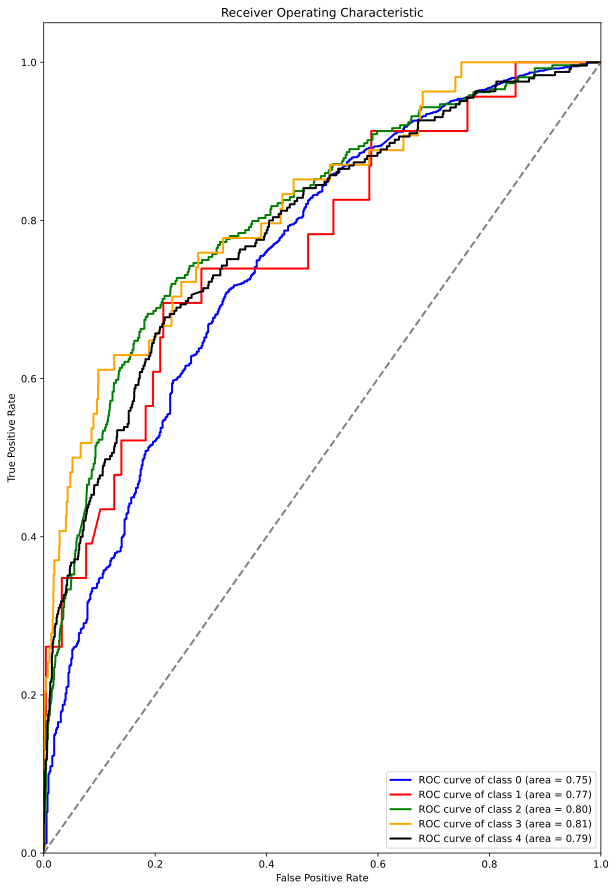

In [279]:
y_pred = svm_pipe3.decision_function(test_df["text"])
plot_roc(y_true, y_pred)

In [280]:
import nltk

for package in ['stopwords','punkt','wordnet']:
    nltk.download(package)
    
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to /Users/jabez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jabez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jabez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [282]:
# collect the stopwords
stop_words    = set(stopwords.words('english'))

In [283]:
class StopWordTokenizer(object):
    """
    StopWordsTokenizer tokenizes words and removes stopwords that are 
    passed in through the the constructor.
    """
    def __init__(self, stop_words):
        import re
        self.stop_words = stop_words
        self.pattern    = re.compile('[\W_]+',re.UNICODE)

    def __call__(self, doc):
        unfiltered_tokens = (self.pattern.sub("",token) for token in word_tokenize(doc.replace("\n", " ")) 
                             if token not in stop_words)
        
        return list(filter(lambda x : len(x) > 1, unfiltered_tokens))

In [284]:
svm_pipe2  = Pipeline([('vect',    CountVectorizer(tokenizer=StopWordTokenizer(stop_words))),
                       ('tfidf',   TfidfTransformer()),
                       ('model',   LinearSVC(class_weight='balanced',
                                            random_state=50))])

evaluate_pipeline(svm_pipe2)

/Users/jabez/Documents/NLP/nlp-summative/.conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


                   precision    recall  f1-score   support

         Opinions       0.83      0.84      0.83      1776
Political Rallies       0.33      0.22      0.26        23
  Positive Events       0.44      0.44      0.44       264
  Security Issues       0.38      0.24      0.30        54
    Voting Issues       0.38      0.40      0.39       245

         accuracy                           0.73      2362
        macro avg       0.47      0.43      0.44      2362
     weighted avg       0.72      0.73      0.72      2362


balanced_accuracy 0.42580598748300613


In [285]:
class StemTokenizer(object):
    """
    StemTokenizer tokenizes words, removes stopwords and stems words
    in each document.
    """
    def __init__(self, stop_words):
        import re
        from nltk.stem import SnowballStemmer
        self.stop_words = stop_words
        self.stemmer    = SnowballStemmer(language='english')
        self.pattern    = re.compile('[\W_]+',re.UNICODE)
        
    def __call__(self, doc):
        unfiltered_tokens = (self.pattern.sub("",self.stemmer.stem(token))  
                             for token in word_tokenize(doc.replace("\n", " ")) 
                             if token not in self.stop_words)
        
        return list(filter(lambda x : len(x) > 1, unfiltered_tokens))

class LemmaTokenizer(object):
    """
    LemmaTokenizer tokenizes words, removes stopwords and lemmatizes words
    in each document.
    """
    def __init__(self, stop_words):
        import re
        from nltk.stem import WordNetLemmatizer
        
        self.stop_words = stop_words
        self.lemmatizer = WordNetLemmatizer()
        self.pattern    = re.compile('[\W_]+',re.UNICODE)
        
    def __call__(self, doc):
        unfiltered_tokens = (self.pattern.sub("",self.lemmatizer.lemmatize(token))  
                             for token in word_tokenize(doc.replace("\n", " ")) 
                             if token not in self.stop_words)
        
        return list(filter(lambda x : len(x) > 1, unfiltered_tokens))

In [287]:
from sklearn.model_selection import GridSearchCV

params = {'vect__tokenizer': (StopWordTokenizer(stop_words=stop_words),
                              StemTokenizer(stop_words=stop_words),
                              LemmaTokenizer(stop_words=stop_words))}

# 5 fold cross validation
svm_grid_search = GridSearchCV(estimator  = svm_pipe3, 
                               param_grid = params, 
                               scoring    = "balanced_accuracy",
                               cv         = 5,
                               n_jobs     =-1)

# fit the models
svm_gs_model = svm_grid_search.fit(train_df["text"], 
                                   train_df["target"])

/Users/jabez/Documents/NLP/nlp-summative/.conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/jabez/Documents/NLP/nlp-summative/.conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/jabez/Documents/NLP/nlp-summative/.conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/jabez/Documents/NLP/nlp-summative/.conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/jabez/Documents/NLP/nlp-summative/.conda/lib/python3.11/site-packages/sklearn/feature_extract

In [288]:
print(svm_gs_model.best_estimator_.steps[0][1])

CountVectorizer(tokenizer=<__main__.StemTokenizer object at 0x1b08a0650>)


In [291]:
svm_pipe3  = Pipeline([('vect',   CountVectorizer(tokenizer=StemTokenizer(stop_words))),
                      ('tfidf',   TfidfTransformer()),
                      ('model',   LinearSVC(class_weight='balanced',
                                            random_state=50))])

evaluate_pipeline(svm_pipe3)

/Users/jabez/Documents/NLP/nlp-summative/.conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


                   precision    recall  f1-score   support

         Opinions       0.83      0.82      0.83      1776
Political Rallies       0.36      0.22      0.27        23
  Positive Events       0.44      0.49      0.46       264
  Security Issues       0.31      0.22      0.26        54
    Voting Issues       0.39      0.43      0.41       245

         accuracy                           0.72      2362
        macro avg       0.47      0.44      0.45      2362
     weighted avg       0.73      0.72      0.72      2362


balanced_accuracy 0.435328227719532


In [323]:
nb_pipe2  = Pipeline([('vect',    CountVectorizer(stop_words=list(stop_words))),
                     ('tfidf',   TfidfTransformer()),
                     ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',   MultinomialNB())])

evaluate_pipeline(nb_pipe2)

                   precision    recall  f1-score   support

         Opinions       0.88      0.62      0.73      1776
Political Rallies       0.18      0.48      0.26        23
  Positive Events       0.38      0.63      0.48       264
  Security Issues       0.19      0.35      0.25        54
    Voting Issues       0.31      0.64      0.42       245

         accuracy                           0.62      2362
        macro avg       0.39      0.54      0.43      2362
     weighted avg       0.74      0.62      0.65      2362

weighted f1 score: 0.653107800837343
balanced_accuracy 0.5449714235894361


AxisError: axis 1 is out of bounds for array of dimension 1

# Classification without handcrafted features - just tweets cleaning

In [315]:
cleaned_df[cleaned_df['source'] == 'africastalking'].sample(10)

,label,text,source,id,data_source_id,merged_label
80369,Opinions,All will be well..,africastalking,28413.0,9110b263-4b34-4679-b83f-96a9ad6ed0be,Opinions
97173,Positive Events,I'm gabra from Kikuyu. Here at Kikuyu we are voting peacefully,africastalking,45242.0,07362a07-828c-4e72-b4c1-a2d7b2e2c4d0,Positive Events
80071,Opinions,WHY DO SOME POLITICIANS IN HOMABAY ABUSE OTHERS CAUSING DISAGREEMENT BETWEEN THEM AND THIS MAY CAUSE CONFLICT AMONG THEM IF IEBC DOES NOT CONDUCT FREE AND FAIR ELECTIONS?,africastalking,28115.0,b5c97a7f-fcdb-4f46-a450-212e30969a5d,Opinions
83148,Voting Issues,What if you find your name missing from the list during election day what can one do?,africastalking,31201.0,62b2b763-ea4e-4772-af1c-61dd28bcdfe5,Voting Issues
80734,Voting Issues,Voter registration,africastalking,28781.0,54a3a83a-b65a-4f88-81bb-06fc11123d1f,Voting Issues
99175,Positive Events,Olereut primary ilmotiook ward narok county,africastalking,47244.0,ec0c92bb-a83e-49f4-a2ad-a9d2deea679e,Positive Events
97223,Polling Station Administration,"IT failed to identify many voters @ Mayingo Primary, Ugunja Constituency, so they are leaving without voting.",africastalking,45292.0,b714c77e-c83b-4d8e-823e-c937ccb4e303,Voting Issues
80869,Opinions,I forsee a calm situation in our country after the upcoming elections,africastalking,28916.0,1f3509e2-e515-41bb-8f28-0d302a7ec3a5,Opinions
80010,Opinions,"We're expecting fare,free and credible election.",africastalking,28054.0,3bc41a5c-91fd-4cec-b18a-30f577ed8716,Opinions
80772,Voting Issues,HOW WILL YOU MAKE SURE THAT THIS ELECTION WILL BE CONDUCTED FREE AND FAIR,africastalking,28819.0,0c4c832b-bcb2-4b34-9597-6919bcbf7071,Voting Issues


In [317]:
cleaned_df[cleaned_df['source'] == 'twitter'].sample(10)

,label,text,source,id,data_source_id,merged_label
71715,Positive Events,Let's vote peacefully #LetPeaceWin,twitter,19756.0,1551893536433479681,Positive Events
27563,Counting and Results,Kash Kaguta\n·\n50m\n@KashugiK\n·\nFollow\nKenyan television channels are giving us different results \n\nCurrent results...\n\nKBT channel\nRuto: 51.34%\nOdinga: 47.99%\n\nCitizen channel \nRuto: 49.75%\nOdinga: 48.87%\n\nNTV channel \nRuto: 47.52%\nOdinga: 51.81%\n\nKTN channel \nRuto: 49.6%\nOdinga: 49.7%,twitter,55561.0,1557639422551724032,Voting Issues
83323,Opinions,"All the polls of options in Kenya have confirmed more than once that Raila Odinga is the 5th president of Kenya, on the ground they have also confirmed the same thing, we are just waiting for the confirmation of the IEBC to announce the 5th president .",twitter,31376.0,1554892975943172097,Opinions
55377,Positive Events,"Its good to be honest to the powers that be. @StateHouseKenya Must know that Kenyatta is currently OUTGOING!!! Period!!! @IEBC, Military, @NPSOfficial_KE @IG_NPS all must know Kenyatta is officially OUTGOING!!! Protect your jobs n your families by ensuring free election.",twitter,25386.0,1553442942701817858,Positive Events
95146,Opinions,"Do not be among the ones sharing misleading information, verify any information before you “forward as received” to ensure you share the correct information.\n“Not today ”!",twitter,43215.0,1556835143247187969,Opinions
2123,Opinions,"The four iebc commissioners who talked about the ""opaqueness"" of the election were hand picked by Uhuru.",twitter,78132.0,1559311118685855744,Opinions
7072,Opinions,#TheVoteKE: Who between Baba Raila Odinga and DP William Ruto is winning the presidency?\n\n+++\n#NairobiUpbeat #SoPolitical #KenyaDecides2022 #UpbeatPolitics #ElectionsKE #GE2022,twitter,61080.0,1558011803552354304,Opinions
27063,Opinions,"An election is not just about the day when people cast ballots and the votes are counted. Its a cycle, and if an election management body fails to give confidence and trust to prior processes and post ballot casting, it will have failed. @ZECzim fails in building that confidence",twitter,55061.0,1557610746984415232,Opinions
91572,Opinions,Hours to go... #GE2022 @IEBCKenya #Elections2022 #,twitter,39641.0,1556535652086317057,Opinions
80066,Opinions,"IEBC just released the register at the various polling centers. So, you can go to physically confirm your details and check whether you have been verified as a voter",twitter,28110.0,1554464500467859457,Opinions


In [ ]:
# Remove alphanumeric characters
# 

# Text Preprocessing

In [714]:
def replace_newline(text):
    cleaned_text = text.replace("\n", " ")
    return cleaned_text

In [350]:
# Remove unicode
def removeUnicode(text):
    """ Removes unicode strings like "\u002c" and "x96" """
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)       
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    return text

In [351]:
# Replacing URLs 
def replaceURL(text):
    """ Replaces url address with "url" """
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

In [352]:
# Replace user mentions e.g. @
def replaceAtUser(text):
    """ Replaces "@user" with "atUser" """
    text = re.sub('@[^\s]+','usr',text)
    return text

In [353]:
# Remove hashtags infront of words
def removeHashtagInFrontOfWord(text):
    """ Removes hastag in front of a word """
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

In [892]:
def replace_numbers(text):
    cleaned_text = re.sub(r"\b\d{1,3}(?:,\d{3})*(?:\.\d+)?%?\b", "NUM", text)
    return cleaned_text

In [355]:
def removeEmoticons(text):
    """ Removes emoticons from text """
    text = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', text)
    return text

In [356]:
def replaceMultiExclamationMark(text):
    """ Replaces repetitions of exlamation marks """
    text = re.sub(r"(\!)\1+", ' multiExclamation ', text)
    return text

def replaceMultiQuestionMark(text):
    """ Replaces repetitions of question marks """
    text = re.sub(r"(\?)\1+", ' multiQuestion ', text)
    return text

def replaceMultiStopMark(text):
    """ Replaces repetitions of stop marks """
    text = re.sub(r"(\.)\1+", ' multiStop ', text)
    return text

In [869]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator) # Technique 7: remove punctuation
    return text    

In [870]:
def lower_case(text):
    # remove newline and tab characters
    text = text.replace("\n","").replace("\t","")
    # strip whitespace
    text = text.strip()
    # lowercase
    text = text.lower()
    return text

In [898]:
stoplist = stopwords.words('english')
my_stopwords = "usr url atuser st rd nd th am pm kenyadecides2022 kenyaschoice2022 kenyadecid iebc num multiexclamation multiquestion multistop" # my extra stopwords
stoplist = stoplist + my_stopwords.split()

In [899]:
def remove_stopwords(text):
     # Tokenize the text into words
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stoplist]

    #     # Lemmatize words
    # lemmatizer = WordNetLemmatizer()
    # cleaned_text = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # stemmer = PorterStemmer() 
    # cleaned_text = [stemmer.stem(word) for word in filtered_tokens]
    
    # Join the cleaned tokens back into a single string
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text

In [900]:
def clean_text(text):
    text = replace_newline(text)
    text = replace_numbers(text)
    text = removeUnicode(text)
    text = replaceURL(text)
    text = replaceAtUser(text)
    text = removeHashtagInFrontOfWord(text)
    text = removeEmoticons(text)
    text = replaceMultiExclamationMark(text)
    text = replaceMultiQuestionMark(text)
    text = replaceMultiStopMark(text)
    text = remove_punctuation(text)
    text = lower_case(text)
    text = remove_stopwords(text)
    return text

In [901]:
test_samples = list(data_df['text'].sample(5))
test_samples

['https://twitter.com/1357782174267809796/status/1551299231780114432',
 'Haha IEBC allowed us to have parallel tallying then deny us to announce the results in the event that we are fast?? Burukenge sana (Salamander)',
 'Leo ndio ile siku, tupatane every route tuendelee kunyoosha mazungumzo kabla ya kunyoosha Kigumo kuanzia mwezi ujao.',
 'Youth Peace and Voter Educators Training  for Lower Eastern &Coastal regions@ PrideInn Paradise\nEmpowering the youth to engage and take role in peaceful elections.\n\n#UchaguziWaAmani\n\n@YEDNetworkKe \n@VybezRadioKE \n@UNDPKenya \n@IEBCKenya \n@IEBC_YCC \n@NYC_YouthVoice',
 'Raila is un opposed. Ruto is campaigns again Uhuru who is not in the race. Maybe IEBC forgot to inform Ruto that Uhuru kenyatta is retiring.']

In [902]:
for ts in test_samples:
    print(clean_text(ts) + "\n")



haha allowed us parallel tallying deny us announce results event fast burukenge sana salamander

leo ndio ile siku tupatane every route tuendelee kunyoosha mazungumzo kabla ya kunyoosha kigumo kuanzia mwezi ujao

youth peace voter educators training lower eastern coastal regions prideinn paradise empowering youth engage take role peaceful elections uchaguziwaamani

raila un opposed ruto campaigns uhuru race maybe forgot inform ruto uhuru kenyatta retiring



In [903]:
# Full Duplicates - tweet and label are the same
duplicates = data_df.duplicated(["text","label"])
print(f"Full duplicates: {len(duplicates[duplicates == True])}")

Full duplicates: 457


In [904]:
# Duplicate tweets that have different labels
duplicates = data_df.duplicated(["text"])
print(f"Duplicates with different labels: {len(duplicates[duplicates == True])}")

# Count the number of tweets before dropping
print(f"The number of tweets before dropping duplicates is {len(data_df)}")

# Drop the full duplicates
cleaned_df = data_df.drop_duplicates(subset=["text"])
print(f"The number of tweets after dropping duplicates is {len(cleaned_df)}")

Duplicates with different labels: 566
The number of tweets before dropping duplicates is 12374
The number of tweets after dropping duplicates is 11808


In [905]:
# Count the number of tweets before dropping
print(f"The number of tweets before dropping duplicates is {len(data_df)}")

# Drop the full duplicates
cleaned_df = data_df.drop_duplicates(subset=["text"])
print(f"The number of tweets after dropping duplicates is {len(cleaned_df)}")

The number of tweets before dropping duplicates is 12374
The number of tweets after dropping duplicates is 11808


In [906]:
# Apply the clean text function to the tweet column
cleaned_df["clean_text"] = cleaned_df["text"].map(clean_text)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_2813/2063305511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["clean_text"] = cleaned_df["text"].map(clean_text)


In [1]:
cleaned_df[["label","text","clean_text"]].sample(10)

NameError: name 'cleaned_df' is not defined

In [910]:
cleaned_df['clean_text'].replace('', np.nan, inplace=True)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_2813/848052644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['clean_text'].replace('', np.nan, inplace=True)


In [911]:
cleaned_df.dropna(subset=['clean_text'], inplace=True)

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_2813/643976075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=['clean_text'], inplace=True)


In [912]:
cleaned_df.shape

(11553, 7)

In [913]:
cleaned_df["test_label"] = cleaned_df['label'].replace({'Polling Station Administration':"Voting Issues",'Staffing Issues':"Voting Issues"})

/var/folders/pz/qy3yq1t97s7g1m5s3hbsqjpc0000gn/T/ipykernel_2813/4013867607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["test_label"] = cleaned_df['label'].replace({'Polling Station Administration':"Voting Issues",'Staffing Issues':"Voting Issues"})


In [914]:
cleaned_df["test_label"].unique()

array(['Opinions', 'Political Rallies', 'Positive Events',
       'Security Issues', 'Voting Issues', 'Counting and Results'],
      dtype=object)

In [915]:
# Step 3: Prepare data
# Assume you have your text data in the 'data' list and corresponding labels in the 'labels' list
train_data, test_data = train_test_split(cleaned_df, test_size=0.20)

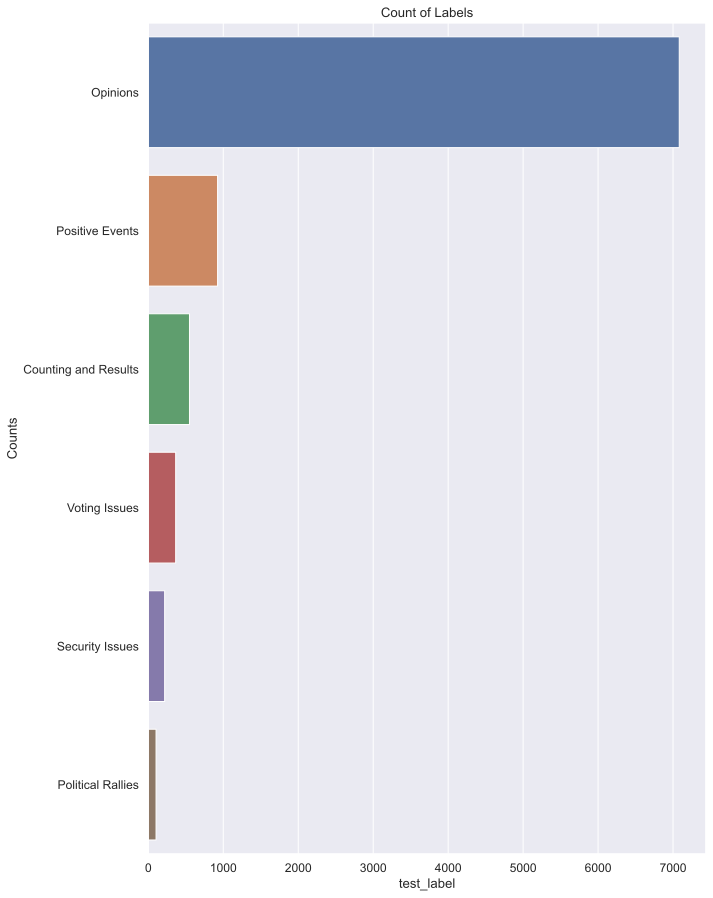

In [916]:
# Get label distribution to visualise class imbalances
# Group by survey and calculate counts for each label

grouped_counts = train_data.groupby("test_label").size().reset_index(name='Counts').sort_values(["Counts"], ascending=False)
sns.barplot(data=grouped_counts, x='Counts', y='test_label')
plt.xlabel('test_label')
plt.ylabel('Counts')
plt.title('Count of Labels')
plt.show()

In [917]:
from sklearn.metrics import confusion_matrix

In [918]:
#Util function to plot confusion matrix
def plot_cm(labels, predictions):
    # predictions has values in [0,1]
    cm = confusion_matrix(labels, predictions)
    # Change figure size and increase dpi for better resolution
    plt.figure(figsize=(8,6), dpi=100)
    # Scale up the size of all text
    sns.set(font_scale = 1.1)
    # Plot Confusion Matrix using Seaborn heatmap()
    # Parameters:
    # first param - confusion matrix in array format   
    # annot = True: show the numbers in each heatmap cell
    # fmt = 'd': show numbers as integers. 
    ax = sns.heatmap(cm, annot=True, fmt='d', )
    # set x-axis label and ticks. 


    # set y-axis label and ticks
    ax.set_ylabel("Gold Label", fontsize=14, labelpad=20)

    # set plot title
    ax.set_title("Confusion Matrix", fontsize=14, pad=20)

    plt.show()

In [954]:
def evaluate_model2(
    train_df : pd.DataFrame,
    test_df  : pd.DataFrame,
    mapping  : dict,
    pipe     : Pipeline,
) -> None:

    model = pipe.fit(train_df["text"], 
                     train_df["target"])


    pred  = model.predict(test_df["text"])

    print(classification_report(test_df["target"],
                                pred, 
                                target_names=mapping))
    
    print("weighted f1 score:", f1_score(test_df["target"], 
                                     pred, 
                                     average="weighted"))
    print("balanced_accuracy", balanced_accuracy_score(test_df["target"], 
                                                       pred))
    

In [955]:
labeler = LabelEncoder()
train_data["target"] = labeler.fit_transform(train_data["test_label"])
test_data["target"] = labeler.transform(test_data["test_label"])

In [956]:
train_data["test_label"].unique()

array(['Counting and Results', 'Opinions', 'Positive Events',
       'Political Rallies', 'Voting Issues', 'Security Issues'],
      dtype=object)

In [963]:
from functools import partial

evaluate_pipeline = partial(evaluate_model2,
                            train_data,
                            test_data,
                            mapping)

In [964]:
nb_pipe2  = Pipeline([('vect',    CountVectorizer(stop_words=stoplist)),
                     ('tfidf',   TfidfTransformer()),
                    #  ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',  LinearSVC(class_weight='balanced',
                                            random_state=50))])

In [965]:
evaluate_pipeline(nb_pipe2)

                      precision    recall  f1-score   support

Counting and Results       0.36      0.38      0.37       143
            Opinions       0.85      0.84      0.84      1781
   Political Rallies       0.07      0.05      0.06        22
     Positive Events       0.40      0.49      0.44       218
     Security Issues       0.50      0.33      0.40        63
       Voting Issues       0.34      0.32      0.33        84

            accuracy                           0.74      2311
           macro avg       0.42      0.40      0.41      2311
        weighted avg       0.74      0.74      0.74      2311

weighted f1 score: 0.7362830975524125
balanced_accuracy 0.40118625524270746


In [960]:
from sklearn.preprocessing import label_binarize
import numpy as np

# get the number of classes
n_classes = len(test_data["target"].unique())

# classes = [0,1,2,3]
classes   = np.sort(test_data["target"].unique())

# relabel the test set
y_true = label_binarize(test_data["target"], 
                        classes=classes)

In [961]:
mapping

{'Counting and Results': 0,
 'Opinions': 1,
 'Political Rallies': 2,
 'Positive Events': 3,
 'Security Issues': 4,
 'Voting Issues': 5}

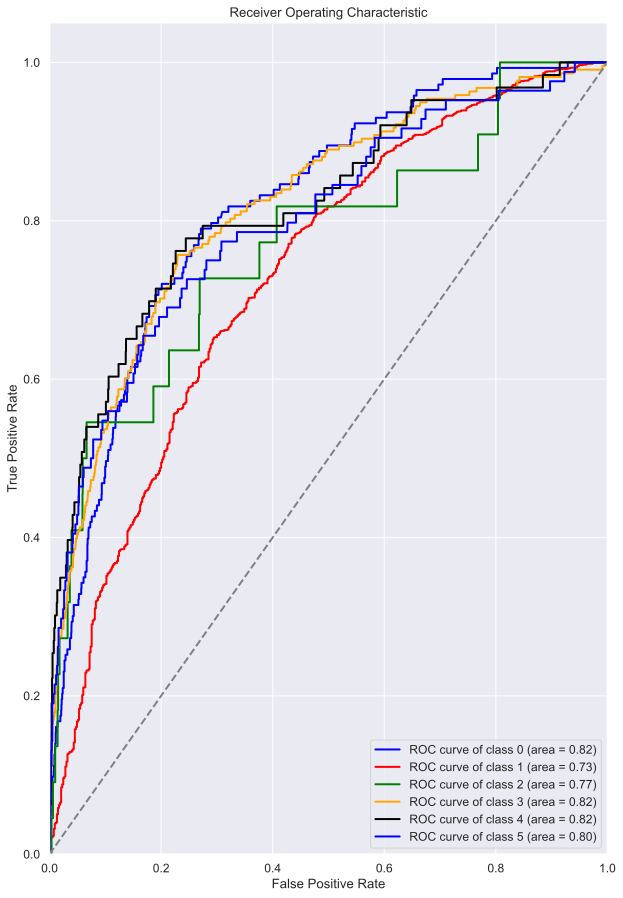

In [962]:
# Take a break, come back and implement NB myself and see the output
y_pred = nb_pipe2.decision_function(test_data["clean_text"])
plot_roc(y_true, y_pred)

In [966]:
nb_pipe2  = Pipeline([('vect',    CountVectorizer(stop_words=list(stop_words))),
                     ('tfidf',   TfidfTransformer()),
                     ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',   MultinomialNB())])

evaluate_pipeline(nb_pipe2)

                      precision    recall  f1-score   support

Counting and Results       0.26      0.63      0.37       143
            Opinions       0.90      0.59      0.71      1781
   Political Rallies       0.12      0.36      0.18        22
     Positive Events       0.32      0.64      0.43       218
     Security Issues       0.26      0.43      0.32        63
       Voting Issues       0.24      0.56      0.34        84

            accuracy                           0.59      2311
           macro avg       0.35      0.53      0.39      2311
        weighted avg       0.75      0.59      0.63      2311

weighted f1 score: 0.6322270536920992
balanced_accuracy 0.5349152668428768


In [928]:
nb_pipe  = Pipeline([('vect',    CountVectorizer()),
                     ('tfidf',   TfidfTransformer()),
                     ('sampler', RandomOverSampler(sampling_strategy='not majority',random_state=42)),
                     ('model',  MultinomialNB())])

In [929]:
mapping

{'Counting and Results': 0,
 'Opinions': 1,
 'Political Rallies': 2,
 'Positive Events': 3,
 'Security Issues': 4,
 'Voting Issues': 5}

In [930]:
evaluate_pipeline(nb_pipe)

                      precision    recall  f1-score   support

Counting and Results       0.25      0.66      0.36       143
            Opinions       0.89      0.57      0.70      1781
   Political Rallies       0.12      0.36      0.18        22
     Positive Events       0.32      0.64      0.42       218
     Security Issues       0.24      0.41      0.30        63
       Voting Issues       0.24      0.52      0.32        84

            accuracy                           0.57      2311
           macro avg       0.34      0.53      0.38      2311
        weighted avg       0.75      0.57      0.62      2311

weighted f1 score: 0.6202291753828426
balanced_accuracy 0.5274074503465783


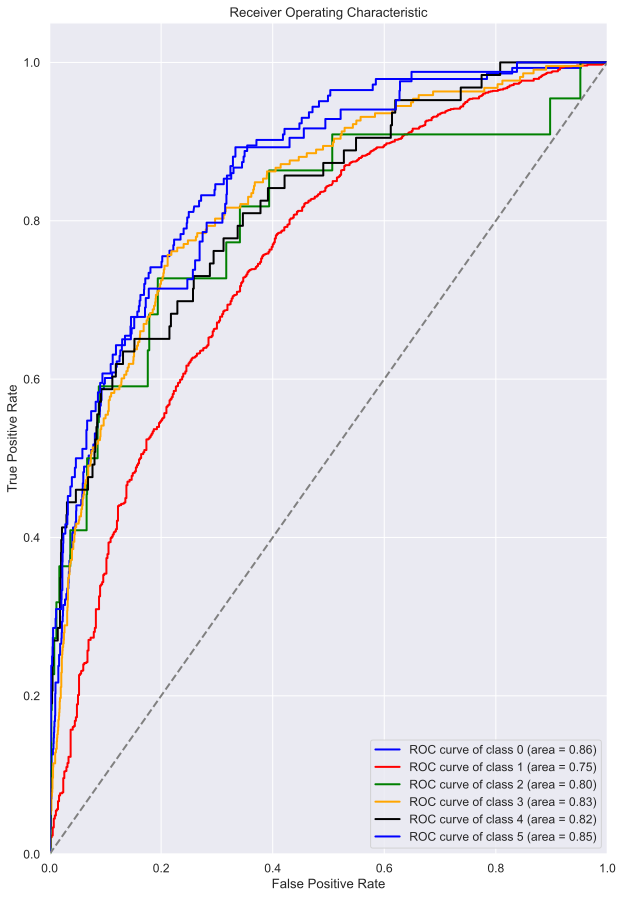

In [931]:
# Take a break, come back and implement NB myself and see the output
y_pred = nb_pipe.predict_proba(test_data["clean_text"])
plot_roc(y_true, y_pred)

In [932]:
y_pred = nb_pipe.predict(test_data["clean_text"])

In [933]:
y_true

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [934]:
mapping

{'Counting and Results': 0,
 'Opinions': 1,
 'Political Rallies': 2,
 'Positive Events': 3,
 'Security Issues': 4,
 'Voting Issues': 5}

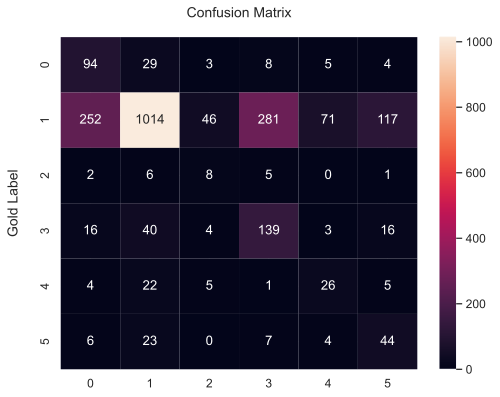

In [935]:
plot_cm(test_data['target'], y_pred)

In [ ]:
# Look into mispredicted labels and further investigate